# Data science cookbook

This data science cookbook is a result of my personal revision of the course material of the Data Science Immersive course @ General Assembly in London, late spring 2018. I have researched anything that was not clear to me and added material I found that was not covered.

There are many cookbooks and some authors seem to make a living out of it. The sole purpose of this work is that it acts as a reflection of $my$ 'the art of data science'-internalization process.

A nice side effect is that it also acts as $my$:
- Data Science workflow guide
- Code-snippit library
- Source of inspiration

It is by no means complete, will contain many bugs. I will continue to work on it.

I have endeavoured to consistently address equal object/variables. This enables copy-pasting code snippets:

    - df, pd.DataFrame
    - X, Feature Set (Pandas DataFrame)
    - y, Target (Pandas Series)
    - X_train, Training set Features
    - y_train, Training set Target
    - X_test, Test set Features
    - y_test, Test set Target
    - model, SkLearn Regression model
    - clf, SkLearn classifier
    - score(s), appropriate (CV)score(s)
    - params, Initial general purpose Grid Search parameter dictionary
    
There are many ways to Rome and, as far as this cookbook is concerned, $not$, a single one will lead through New Jersey. So I have varied how the solutions are coded, just to illustrate the possible variety.

Most code is notebook style, i.e. not production ready, so use for prototyping; I am not the greatest coder on earth anyway.

Some people find a cookbook like this 'cheating'. To them, data science $is$ coding. To me this is the most boring aspect of data science. Although, I too may feel a rush of adrineline when I code something that works. To me, a Data Scientist should focus on feature engeneering, understanding cause and effect and hypothesis testing.

I am not for quotes but my apolegetic small print would sum up as:

![](https://pbs.twimg.com/media/DSvelmpVoAEaiXw.jpg)

In [1]:
#Import a load of packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import warnings

import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_prep = {'Col0' : ['row1', 'row2','row3', 'row4', 'row5', 'row6', 'row_7', 'row_8', 'Row9', 'Row10'],
        'Col1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'col2' : [1.1, 2.2, 3.3, 4.4, np.NaN, 6.6, 7.7, 8.8, np.NaN, 100.10],
       'col3' : [-4, -3, -2, -1, 0, 1, 2, 'Nan', 4, 5],
       'col_a' : ['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj'],
       'col_b' : ['red', 'blue', 'green', 'orange', np.NaN, 'purple', 'white', 'black', 'brown', 'gray'],
        'colc' : [np.NaN,'square','square', 'circle', 'circle', '???', 'triangle', 'triangle', 'triangle','triangle'],
       'ycol' : [True, True, True, True, True, False, False, False, False, False],
       'col4' : ['excellent', 'excellent', 'very good', 'very good', 'good', 'good', 'fair', 'fair', 'appalling', 'appalling']}

In [3]:
# create data set for regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def regression():
    data_regression = datasets.load_diabetes()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Diabetes Dataset Data has been created for Regression ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns in df {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test

In [89]:
df, X, y, X_train, y_train, X_test, y_test = regression()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


In [4]:
# create data set for multiclass classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def multiclass():
    data_multiclass = datasets.load_iris()
    df = pd.DataFrame(data_multiclass['data'],
                      columns=data_multiclass['feature_names'])
    df['ycol'] = data_multiclass['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Iris Dataset Data has been created for multiclass ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test

In [37]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


In [5]:
# create data set for binary classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def binclass():
    data_regression = datasets.load_breast_cancer()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Breast Cancer Dataset Data has been created for Binary ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test
#     result = {'X': X, 'y': y, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
#     return result

In [39]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


In [6]:
#create data set for text/NLP
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
data_text = fetch_20newsgroups(subset='all', categories=categories, shuffle=True)
X = data_text.data
y = data_text.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# print(len(X_train), len(y_train), len(X_test), len(y_test))
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)
# print(X_train.shape, X_test.shape)

#  Data cleaning/EDA
## Considerations

There are some considerations to ponder before starting on any project. This will help in deciding on methodology and trade-offs that need to be made. Being explicit will aid in the acceptance of the modelling exercise.

### Big Data vs Small Data

Before starting consider if the data is **'small'** data or **'big'** data.  

Small data is typically:
-  Collected for the purpose at hand
-  Therefore structured and, relatively, complete
-  A sample or subset of the reality which is used to make generalized statements using inferential maths/stats
-  Low in quantity  
  
Big data on the other hand is typically:
- Collected as a by-product
- Unstructured and not complete
- 3/4/5/6/7/8 V's apply *:
    1. Volume (teramegagigapetabytes of it)
    - Variety (text, sound, pictures, numbers, all in x-number of formats)
    - Velocity (online-realtime and the pace of growth)
    - Veracity (little validation, often 'opinions')
    - Value (the business models are based on it)
    - Vulnerability (Lots of security and business continuity issues)
    - Viability (Lots of 'dead wood': 5% of the attributes drive 95% of the rewards)
    - Visualization (Data is best visually represented, also think of GPS data), or V for visible (Often 'Big Data' is relatively accessable, e.g. webscraping)
- May represent the complete reality.
  
EDA/cleaning for a 'small' data set will often need to be handled with care. The smaller the data set the more care needs to be taken in order to maintain an acceptable sized data set. Careful imputation of missing data will more likely need to be considered rather than just 'dropna(how='any').
  
EDA for 'big' data will likely be focused on reducing the data in terms of number of features in and/or volume of the data. A plain 'dropna' and sample data reduction are very likely venues.
  
In practice a combination of the approaches are likely. Typically the Viability V's critical data columns will have missing data which will require minute surgical imputation in order to achieve the  Value V.

**Big Data** may often be so big that it is a 'black box': it is difficult to get a sense of what goes on inside it. This may lead to application of many models and just seeing what 'works' i.e. gives the best R^2 or best recall. A verification of the result 'making sense' is always required and make sure you have a 'baseline' which a model needs to beat. Check-out http://tylervigen.com/spurious-correlations

**Small Data** typically aims to say something about the entire population based on a sample or subset of that population: based on a random sample what will te result be of the election?  
**Big Data** typically aims to say something about a subset, or even a single individual, of the population based on data from the entire population: based on population data what is Kim Jones likely to vote in the election?

(*Dawn. E Holmes, Big Data, A Very Short Introduction, Oxford University Press, 2017)

### Purpose of the analysis/model

It makes a difference if you are modeling the likelihood of some fatal disease or trying to determine the 'who to target' for a marketing campaign based on webtraffic. In the first case careful, well documented, micro data cleaning/prep is required. In the latter case it may fine to ruthlessly drop 30K out of 100K records and run a LassoCV blindly.

### Technical environment

Very practical stuff like: what is the hardware I have access to? What is the target platform (hard $and$ software) of the model?

### Time

How much time can be spend on this. Consider an 'Agile' way of working: create small value often.

### Lesson from EliteDataScience:
 "Finally, remember that better data beats fancier algorithms. In applied machine learning, algorithms are commodities because you can easily switch them in and out depending on the problem. However, effective exploratory analysis, data cleaning, and feature engineering can significantly boost your results."
https://elitedatascience.com/machine-learning-algorithms

## Getting data
### By importing

#### Data

In [ ]:
data = " pathname " # defaults to you current directory
df = pd.read_csv(data, na_values=['?']) # there are load of options here, like\
                        #filling na's
df.head()
df.shape
df.info()
# EXCEL ALERT!!!!: consider reviewing the data in a spreadsheet 
#first

In [ ]:
data = " pathname " # defaults to you current directory
df = pd.read_excel(data, na_values=['?'])

##### Shuffle data
If you are unfamiliar with the data lineage and the data is not a timeseries consider shuffling it (don't forget (to remember) the random seed!). Although the train-test split has a default shuffling function it does not harm to this here. During EDA/Model development/prototyping it just may happen that unintentionally you get some weird results.

In [ ]:
np.random.seed(12345)
df = df.reindex(np.random.permutation(df.index))

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

##### Cleaning column names
Now is a good time to do it. Suit to you own preferences on naming conventions

In [26]:
df= pd.DataFrame(data_prep)
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [27]:
# basically removes anything that is not a letter, space or underscore.
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase
df.columns = [''.join([ch for ch in col if ch in uppercase+lowercase+' _']) \
              for col in df.columns]
# for each character in each column name join characters together 
# if they are in the string "uppercase+lowercase+' _'"
df.head(3)

,Col,Col,col,col,col,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True


In [28]:
# replace underscore in column names and convert all columns to lowercase:
df = pd.DataFrame(data_prep)
df.columns = [x.lower().replace('_','') for x in df.columns]
df.head(3)

,col0,col1,col2,col3,col4,cola,colb,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True


##### Deleting columns

Get rid of unneeded columns. Columns not needed in the analysis at hand (e.g. static data) AND columns that are duplicates or closely alike: e.g. 'DistanceInMiles' and 'DistanceInKilometers' (Linear Regression doesn't like that for one:-, see comments on colinearity below)) 

In [94]:
df = pd.DataFrame(data_prep)
#explicit colums to be deleted
df.drop(['Col1', 'col2'], axis =1, inplace = True)
#or redefine df with the columns you want
df = df[['col3', 'col4']] #!! [[]] !! not ([])
#rename FIRST if your need to retain the old one
df2 = df[['col3', 'col4']]
#Creativity is also possible
df = [[col for col in df.columns if 'keyword' in col\
       and 'keyword' not in col]] #!![[]]!!

May be a good time to combine/convert columns

In [ ]:
df['colNEW'] = df['col1'] + df['col2'] / df['col3']
df['colNEW'] = 10
df['colNEW'] = np.mean(df['col1'])
df['colNEW'] =df['col1'] / 2,52 # inches to centimeters

Example collinearity:

- Can make choosing the correct predictors to include more difficult.
- Interferes in determining the precise effect of each predictor, but...
- Doesn’t affect the overall fit of the model or produce bad predictions.

In [3]:
#Set up simple data
df = pd.DataFrame({'Xcm': [1, 2, 3, 3, 4], 'y': [2, 3, 4, 4, 3]})
df['Xinch'] = df['Xcm']*2.52 # add collinear element
from sklearn.linear_model import LinearRegression
#define X and y
X = df[['Xcm', 'Xinch']]# or df_.X.values.reshape(-1,1)
X_ = df[['Xcm']]
y = df[['y']]# or df_.y.values.reshape(-1,1)
model = LinearRegression()
model_ = LinearRegression()
#train the models
model.fit(X,y)
print(f'Collinear data coefficients: {model.coef_} and intercept:')
print(model.intercept_)
model_.fit(X_,y)
print(f'NonCollinear data coefficients: {model_.coef_} and intercept:')
print(model_.intercept_)
print(f"The model's R squared with collinearity = {round(model.score(X,y),3)}")
print(f"The model's R squared without collinearity = {round(model_.score(X_,y),3)}")


Collinear data coefficients: [[0.06279093 0.15823315]] and intercept:
[2.]
NonCollinear data coefficients: [[0.46153846]] and intercept:
[2.]
The model's R squared with collinearity = 0.396
The model's R squared withou collinearity = 0.396


In [29]:
pd.set_option("display.precision", 2) #just the display!
df['collypred'] = model.predict(X)
df['noncollypred'] = model_.predict(X_)
df

,Xcm,y,Xinch,colypred,noncolypred
0,1,2,2.52,2.46,2.46
1,2,3,5.04,2.92,2.92
2,3,4,7.56,3.38,3.38
3,3,4,7.56,3.38,3.38
4,4,3,10.08,3.85,3.85


#### Models

A model can be imported to run on new data

In [96]:
# create/train a model
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='auto')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  
y_ = clf.predict(X[100:110])
print(f'predicted y:    {y_}')
import pickle
#Save the model
s = pickle.dumps(clf)

#Import the model
clf2 = pickle.loads(s)

#verify
y__= clf2.predict(X[100:110])
print(f'reloaded model: {y__}')


predicted y:    [2 2 2 2 2 2 2 2 2 2]
reloaded model: [2 2 2 2 2 2 2 2 2 2]


### By webscraping

A very simple example

In [29]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

# declare a list
lincoln_quotes = []

# iteraterate through the 13 pages of lincoln quotes
for page in tqdm(range(1,13)):
    
    # make request for that page
    r = requests.get("https://www.successories.com/iquote/author/291/abraham-lincoln-quotes/{0}".format(page))
    
    # turn into a BeautifulSoup object
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # find quotes on page
    quotes = soup.find_all(name='div', attrs={'class':'quote'})
    
    # add to our quotes list
    for quote in quotes:
        lincoln_quotes.append(quote.text)
print("Total number of quotes scraped: " + str(len(lincoln_quotes)) +"\n")


100%|██████████| 12/12 [00:11<00:00,  1.04it/s]

Total number of quotes scraped: 240



In [30]:
for i in range(0,len(lincoln_quotes),48): #print 5( i.e. every 48th) quotes
    quote_ = "Quote {}: ".format(i)
    print(quote_+str(lincoln_quotes[i]))

Quote 0: "Having thus chosen our course, without guile and with pure purpose, let us renew our trust in God, and go forward without fear and with manly hearts."
Quote 48: "Resolve to be honest at all events: and if in your judgment you cannot be an honest lawyer, resolve to be honest without being a lawyer. Choose some other occupation."
Quote 96: "To stand in silence when they should be protesting makes cowards out of men."
Quote 144: "If we could first know where we are, and whither we are tending, we could then better judge what to do, and how to do it."
Quote 192: "My dream is of a place and a time where America will once again be seen as the last best hope of earth."


## Intitial EDA

EDA, cleaning, preprocessing, feature engeneering and, even, modeling is in practice an iterative process, going back and forth and back again. To illustrate the importance consider the Anscombe quartet:

In [30]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [36]:
df.T #Transpose for display purposes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
dataset,I,I,I,I,I,I,I,I,I,I,I,II,II,II,II,II,II,II,II,II,II,II,III,III,III,III,III,III,III,III,III,III,III,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV
x,10,8,13,9,11,14,6,4,12,7,5,10,8,13,9,11,14,6,4,12,7,5,10,8,13,9,11,14,6,4,12,7,5,8,8,8,8,8,8,8,19,8,8,8
y,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68,9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74,7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73,6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89


In [5]:
# Basic stats, may be deceiving
df.groupby(by=df.dataset).describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

In [40]:
#R2 for the datasets, all the same with p_values < 0,01, i.e. very significant
from scipy import stats

dataset = ['I', 'II', 'III', 'IV']
r2 = []
for i in ['I', 'II', 'III', 'IV']:
    x = df.loc[df.dataset == i].x
    y = df.loc[df.dataset == i].y
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r2.append((r_value**2, p_value))

r2 = zip(dataset, r2, )
for r in r2:
    print(r)


('I', (0.666542459508775, 0.00216962887307879))
('II', (0.666242033727484, 0.0021788162369108066))
('III', (0.6663240410665591, 0.0021763052792280256))
('IV', (0.6667072568984652, 0.002164602347197222))


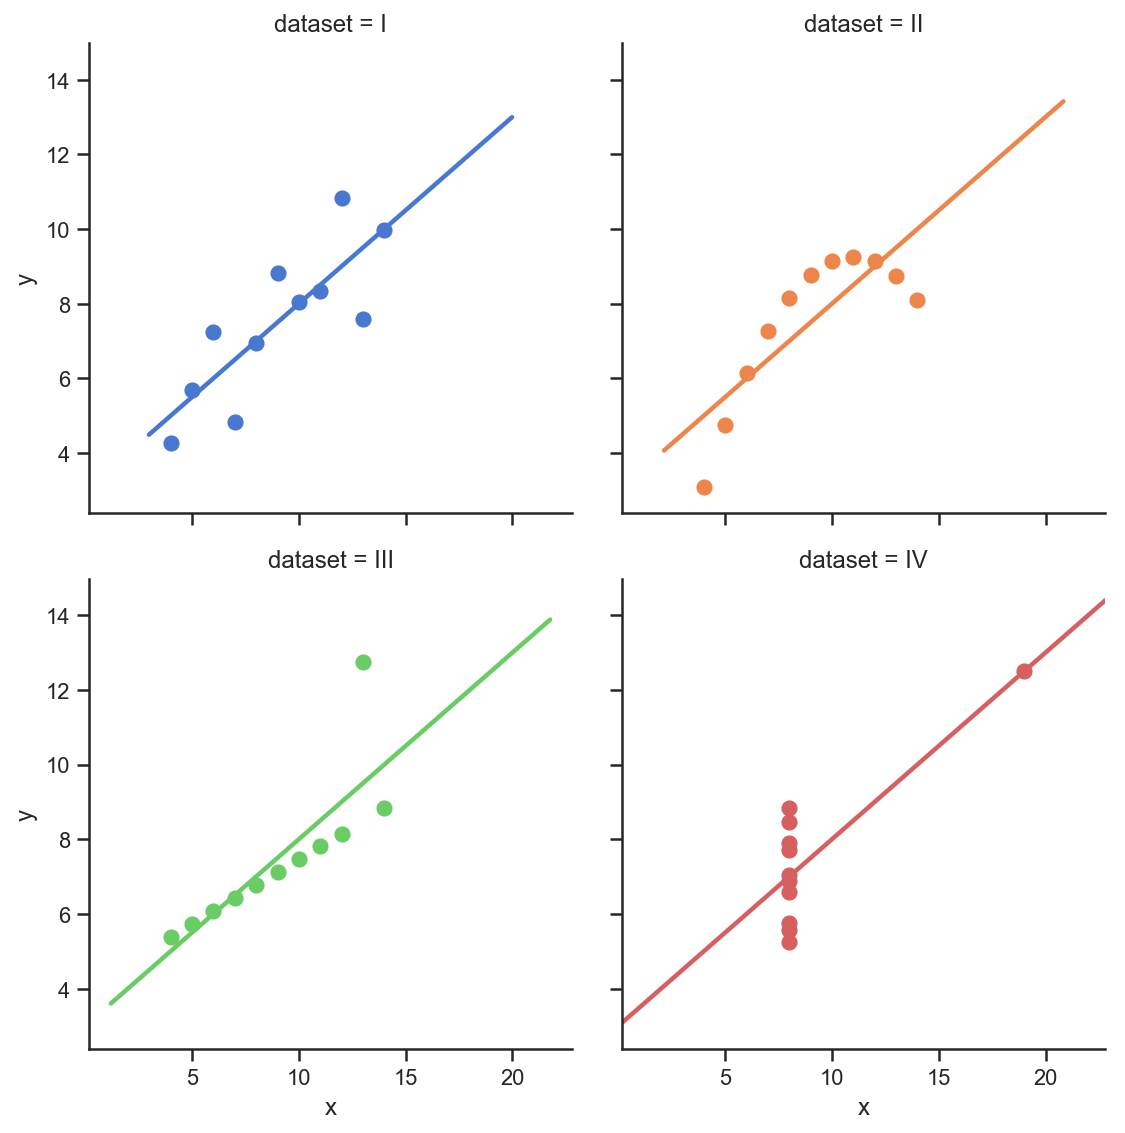

In [37]:
# A visual inspection may lead to different conclusions
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});
#https://seaborn.pydata.org/examples/anscombes_quartet.html

#### some other common pitfalls
See also:[edit]
https://en.wikipedia.org/wiki/Simpson%27s_paradox  
Ecological fallacy (and ecological correlation)  
Low birth-weight paradox   
Modifiable areal unit problem  
Prosecutor's fallacy  
Berkson's paradox (Cause and effect. e.g. in a primary school taller pupil are better at reading comprehension. Obviously taller pupils will also be older.... Especially in medicine the difference can be extremely subtle)

### EDA

In [45]:
#create some data
df = pd.DataFrame(data_prep)
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [41]:
df.shape # rows x columns

(44, 3)

In [33]:
df.columns

Index(['Col0', 'Col1', 'col2', 'col3', 'col4', 'col_a', 'col_b', 'colc',
       'ycol'],
      dtype='object')

In [48]:
df.dtypes

Col0      object
Col1       int64
col2     float64
col3      object
col4      object
col_a     object
col_b     object
colc      object
ycol        bool
dtype: object

In [35]:
df.head()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True


In [36]:
df.tail()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [37]:
df.sample(5)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True


In [38]:
df.describe(include='all')

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
count,10,10.00000,8.000000,10.0,10,10,9,9,10
unique,10,NaN,NaN,10.0,5,10,9,4,2
top,row_8,NaN,NaN,-1.0,very good,bbb,orange,triangle,True
freq,1,NaN,NaN,1.0,2,1,1,4,5
mean,NaN,5.50000,16.775000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.02765,33.775297,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.25000,3.025000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.50000,5.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.75000,7.975000,NaN,NaN,NaN,NaN,NaN,NaN


Lots of columns:

In [ ]:
x = df.select_dtypes(include=['int64'])# 'int', 'float', object, 'datetime'
y = x.describe()
y.to_csv('out.csv')
y.to_excel('out.xls') # EXCEL ALERT!!! :-(((
# and have a look in Excel, OO(OpenOffice)

Or create a standardised box plot

In [40]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


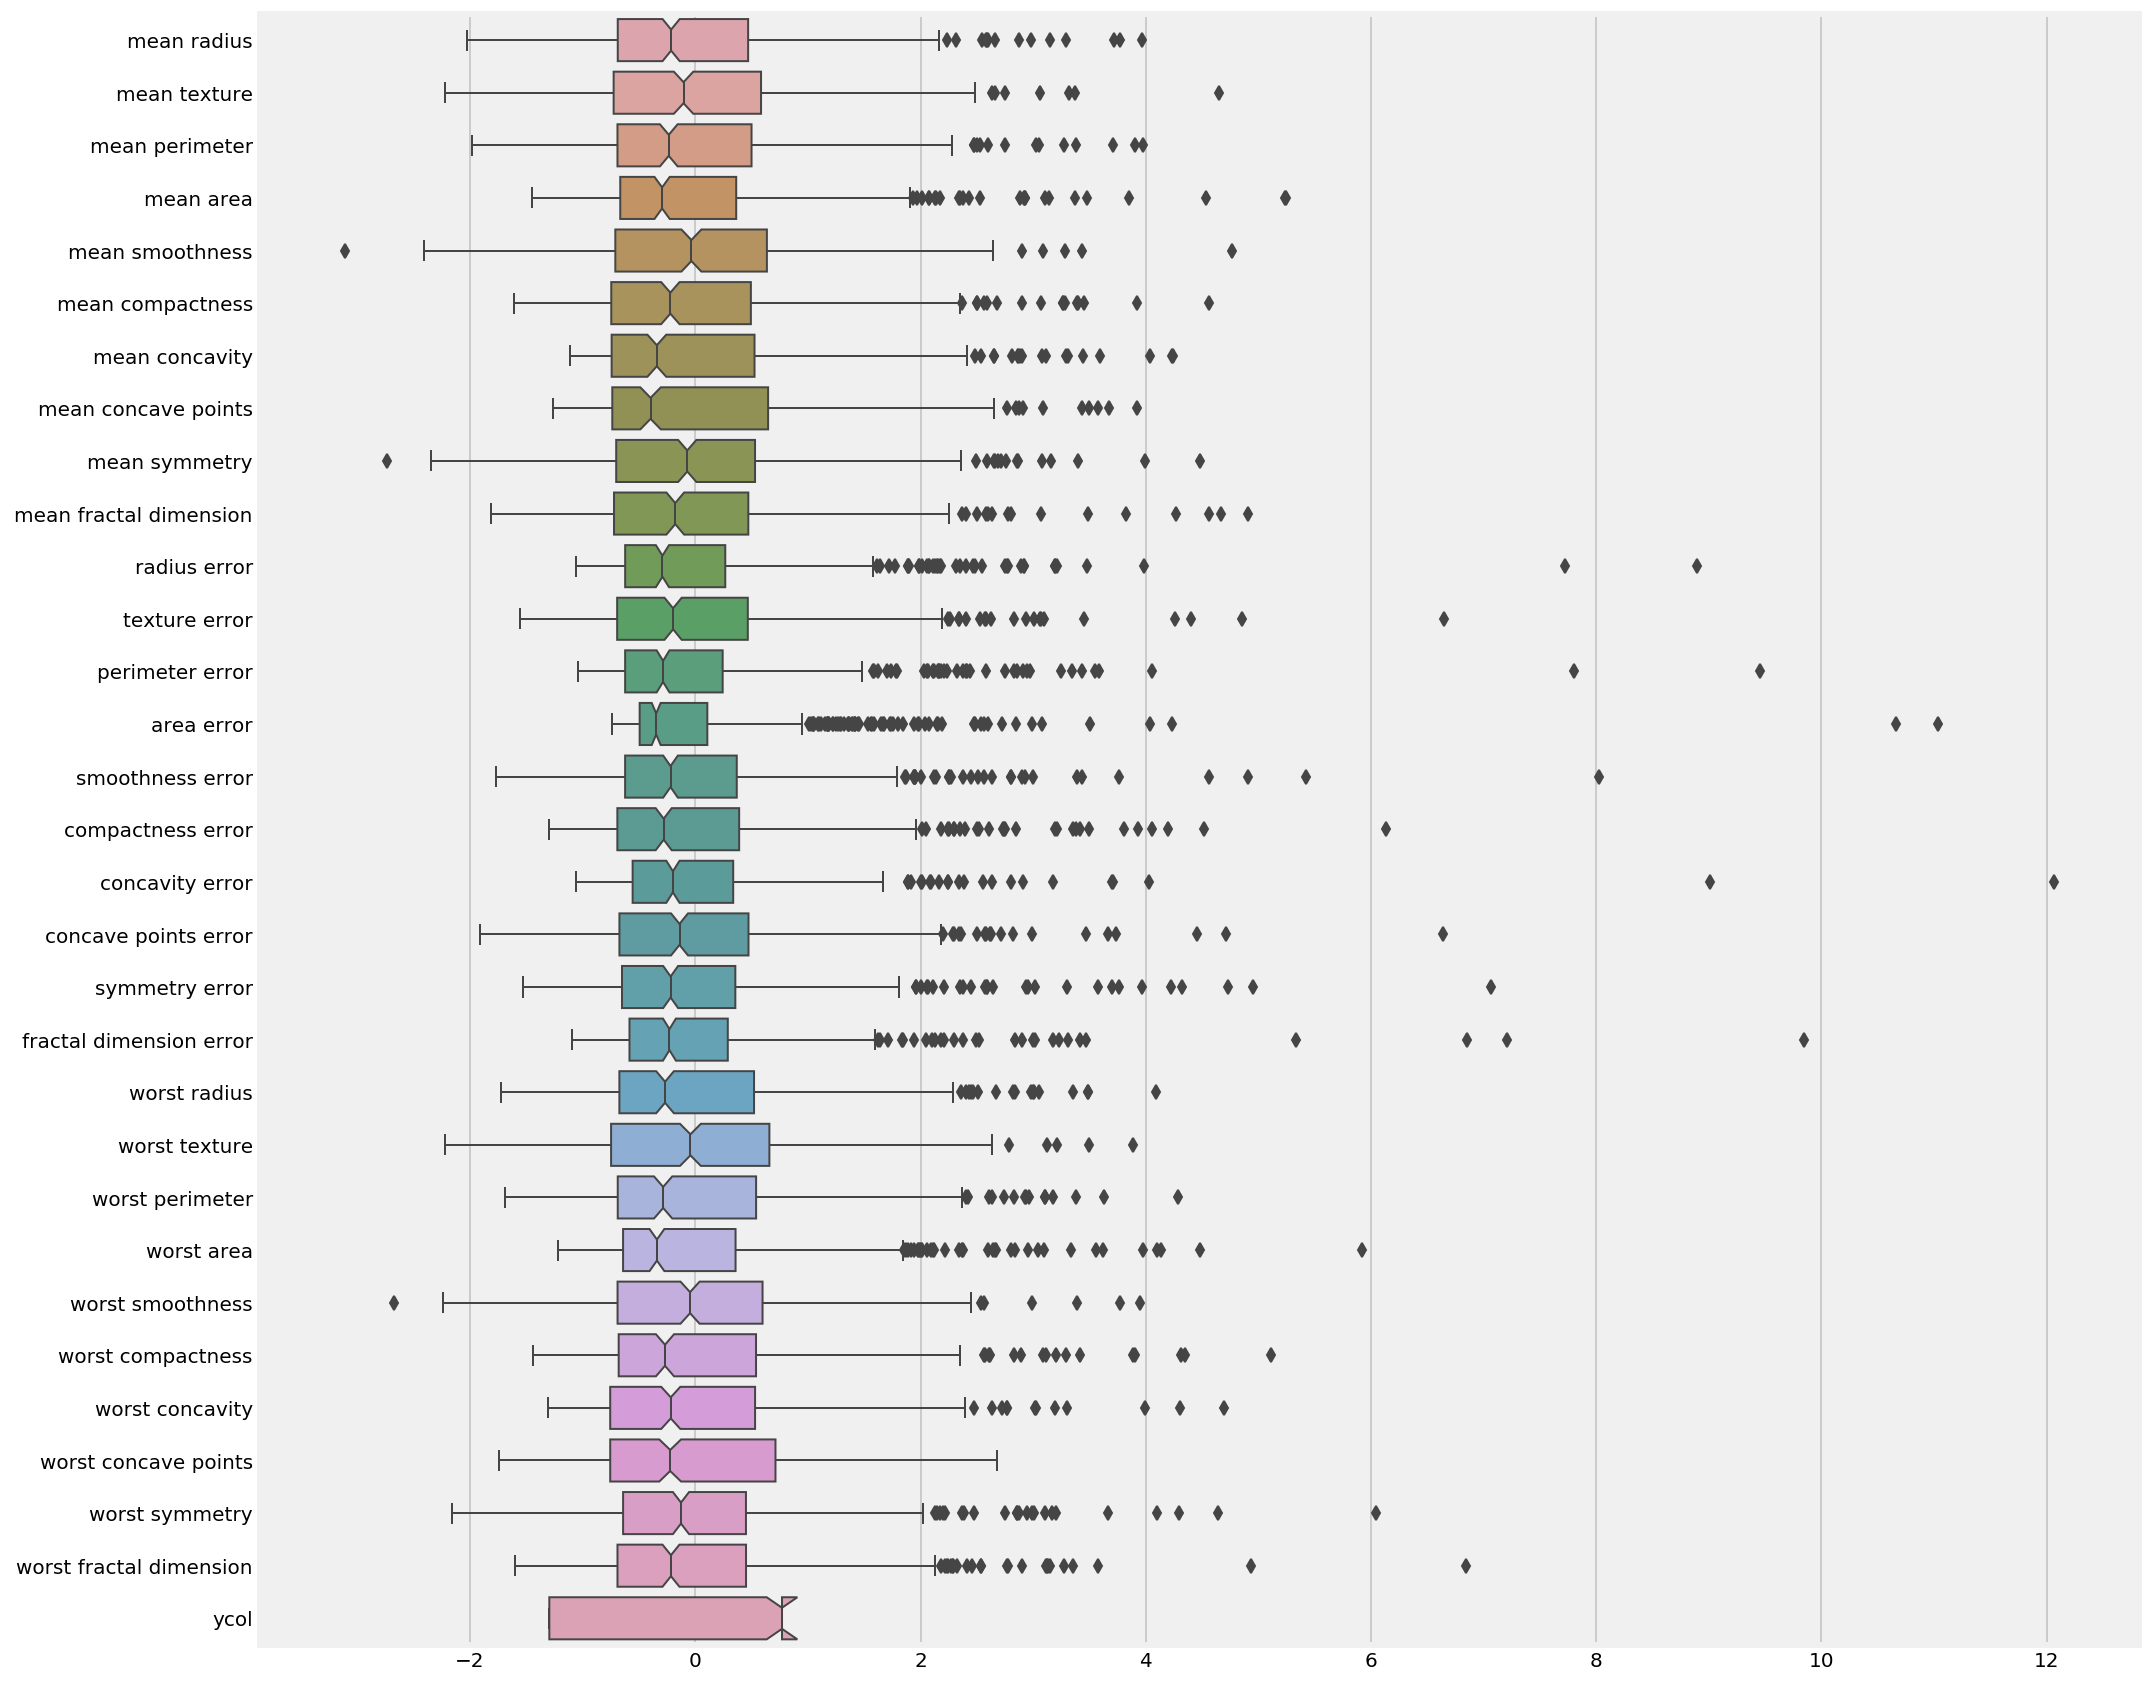

In [41]:
#standardize the numerical columns
import numpy as np
df_num = df.select_dtypes(exclude=['object'])
df_stand = (df_num - df_num.mean()) / df_num.std()
#draw the plot
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax = sns.boxplot(data=df_stand, orient='h', fliersize=5, 
                 linewidth=1, notch=True, saturation=0.5, ax=ax)
plt.show()

In [45]:
df = pd.DataFrame(data_prep)

In [46]:
#Initial EDA
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats # select suspect columns

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
counts,10,10,8,10,10,10,9,9,10
uniques,10,10,8,10,5,10,9,4,2
missing,0,0,2,0,0,0,1,1,0
missing_perc,0%,0%,20%,0%,0%,0%,10%,10%,0%
types,unique,numeric,numeric,unique,categorical,unique,unique,categorical,bool


In [47]:
dfs.summary() # inspect the suspects

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
count,NaN,10,8,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.5,16.775,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.02765,33.7753,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1,1.1,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.25,3.025,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.5,5.5,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.75,7.975,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,10,100.1,NaN,NaN,NaN,NaN,NaN,NaN
counts,10,10,8,10,10,10,9,9,10
uniques,10,10,8,10,5,10,9,4,2


/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:130: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.mean() + multiplier * series.std())
/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:143: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.median() + multiplier * series.mad())


mean                              16.775
std                              33.7753
variance                         1140.77
min                                  1.1
max                                100.1
5%                                 1.485
25%                                3.025
50%                                  5.5
75%                                7.975
95%                               68.145
iqr                                 4.95
kurtosis                         7.84875
skewness                          2.7928
sum                                134.2
mad                              20.8312
cv                               2.01343
zeros_num                              0
zeros_perc                            0%
deviating_of_mean                      2
deviating_of_mean_perc               20%
deviating_of_median                    3
deviating_of_median_perc             30%
top_correlations            Col1: 68.79%
counts                                 8
uniques         

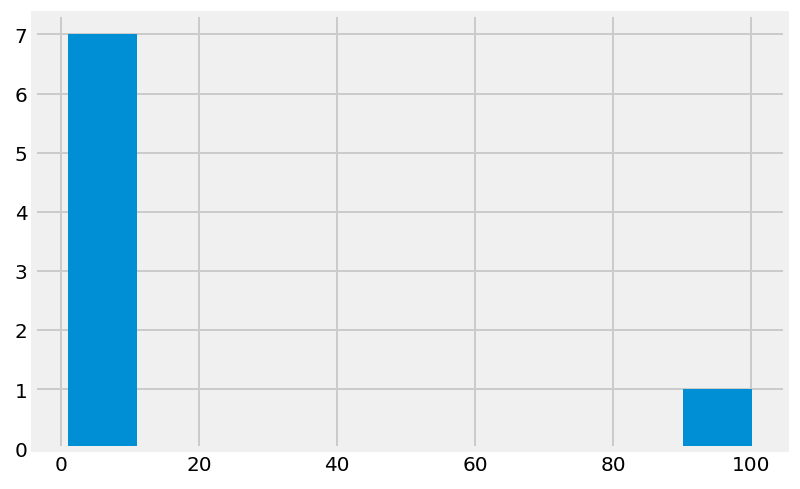

In [48]:
dfs['col2'] # detail the suspects

### Summerizing the data

#### Group by

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.groupby(['day', 'sex', 'smoker'])[['tip']].mean()

tip
day  sex    smoker      
Thur Male   Yes     3.06
            No      2.94
     Female Yes     2.99
            No      2.46
Fri  Male   Yes     2.74
            No      2.50
     Female Yes     2.68
            No      3.12
Sat  Male   Yes     2.88
            No      3.26
     Female Yes     2.87
            No      2.72
Sun  Male   Yes     3.52
            No      3.12
     Female Yes     3.50
            No      3.33

#### Numericals:  Excel-like pivot tables

In [7]:
pd.set_option("display.precision", 2) #just the display!
pd.pivot_table(tips, index = ['day','smoker'], columns = 'sex', aggfunc=np.mean, margins=True)

size                tip              total_bill              
sex          Male Female   All  Male Female   All       Male Female    All
day  smoker                                                               
Thur Yes     2.30   2.43  2.35  3.06   2.99  3.03      19.17  19.22  19.19
     No      2.50   2.48  2.49  2.94   2.46  2.67      18.49  16.01  17.11
Fri  Yes     2.12   2.00  2.07  2.74   2.68  2.71      20.45  12.65  16.81
     No      2.00   2.50  2.25  2.50   3.12  2.81      17.48  19.37  18.42
Sat  Yes     2.63   2.20  2.48  2.88   2.87  2.88      21.84  20.27  21.28
     No      2.66   2.31  2.56  3.26   2.72  3.10      19.93  19.00  19.66
Sun  Yes     2.60   2.50  2.58  3.52   3.50  3.52      26.14  16.54  24.12
     No      2.88   3.07  2.93  3.12   3.33  3.17      20.40  20.82  20.51
All          2.63   2.46  2.57  3.09   2.83  3.00      20.74  18.06  19.79

#### Categoricals: Old-fashioned Cross-Tabs

In [52]:
#counts
a=tips.day
b=tips.smoker
c=tips.sex
pd.crosstab(a, [b, c], rownames=['day'], colnames=['smoker', 'gender'], margins=True)
# see that you do not need to create a DataFrame to use pandas functionality

smoker  Yes          No         All
gender Male Female Male Female     
day                                
Thur     10      7   20     25   62
Fri       8      7    2      2   19
Sat      27     15   32     13   87
Sun      15      4   43     14   76
All      60     33   97     54  244

In [53]:
#percentages 
pd.set_option('precision',1)
df___ = pd.crosstab(a, [b, c], rownames=['day'], colnames=['smoker', 'gender'], normalize=True)
df___*100

smoker   Yes           No       
gender  Male Female  Male Female
day                             
Thur     4.1    2.9   8.2   10.2
Fri      3.3    2.9   0.8    0.8
Sat     11.1    6.1  13.1    5.3
Sun      6.1    1.6  17.6    5.7

## Real world: Imperfect data (and what to do)

### Target(y) is skewed (i.e. not 'Bell'-shaped)
- Apply log Transformation to target (and np.exp the predicted outcome to get the predicted y)
- Models less sensitive to this problem:
    - KNN (Regressor/Classifier)
    - (Boosted) Forest/Trees

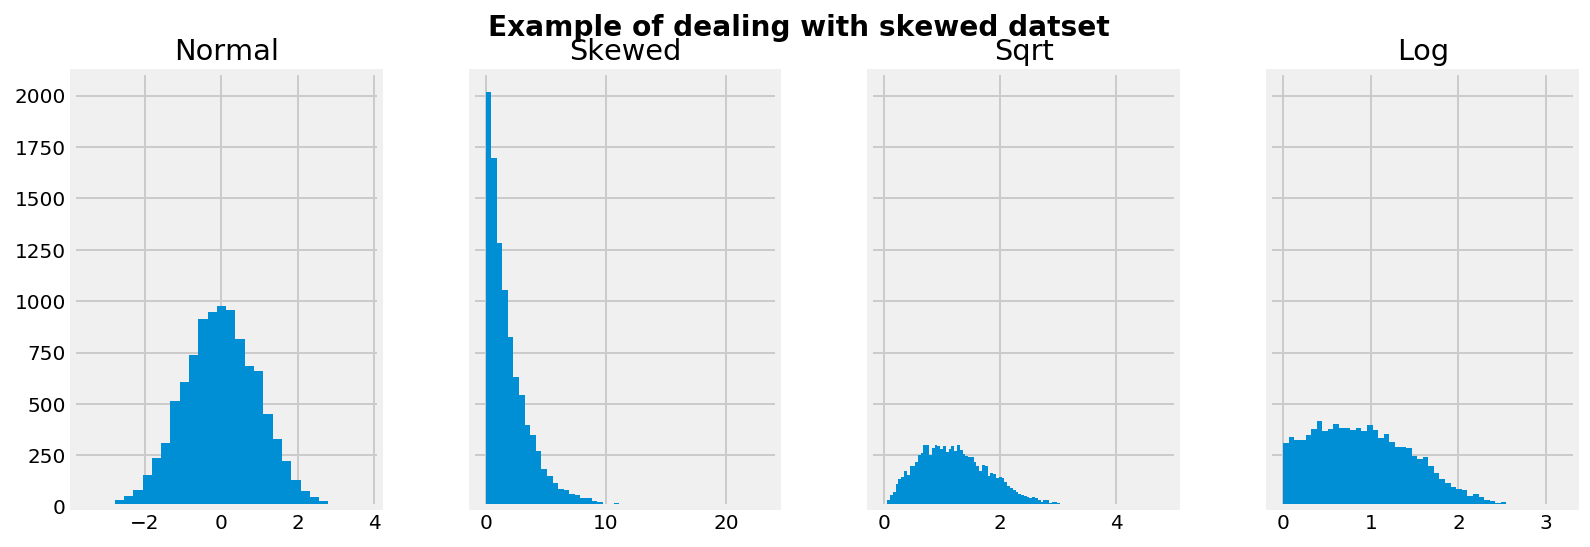

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

normally_distributed = np.random.normal(size=10000)  # Generate normal data*
normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF
skewed = np.random.exponential(scale=2,      # Generate skewed data
                               size= 10000)  
skewed = pd.DataFrame(skewed)                # Convert to DF
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4 , sharey=True, figsize = (12,4))

normally_distributed.hist(bins=30, ax=ax1)        # Plot histogram
ax1.set_title("Normal")
skewed.hist(bins=50, ax = ax2)# Plot histogram
ax2.set_title("Skewed")
sqrt_transformed.hist(bins=100, ax=ax3)# Plot histogram
ax3.set_title("Sqrt")
log_transformed.hist(bins=50, ax=ax4)           # Plot histogram
ax4.set_title("Log")
fig.suptitle('Example of dealing with skewed datset\n', fontsize=14, fontweight='bold')


plt.show()

### Non-linear relationships
- Apply Polynomial transformations
- Model less sensitive to this problem:
    - (Boosted) Forest/Trees

In [ ]:
#example see Chapter 6

    
### Imbalanced (y) in data sets
- Adjust **training** data set; sklearn.imbalanced-learn  
I.e. the model is trained on the synthetically balanced set and tested on the original unbalanced test set.
    **Note** set stratify=True @ train/test split; this ensures that all splits have the same y/target category/value distribution.
    
    - Under-sampling (for 1 large category among smaller ones)

In [54]:
df = pd.DataFrame(data_prep) #create data
df['col2'].fillna(method='ffill', inplace=True) # Nan's are not appreciated
df['col4'] = ['excellent', 'excellent', 'excellent',
              'excellent', 'good', 'good', 'fair', 'fair', 'fair', 'fair'] #unbalance the y
df = df.append([df]*5) #SMOTES needs a larger dataset
df.reset_index()
X_train = df[['col2']] #limiting df to avoid data cleaning
y_train = df['col4'].values

from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(
    random_state=123, return_indices=True, replacement=False)
under_sampler.fit(X_train, y_train)
X_train_u, y_train_u, idx_returned = under_sampler.sample(X_train, y_train)

In [55]:
df.shape

(60, 9)

In [56]:
X_train_u.shape #36 of 600 records left

(36, 1)

In [57]:
# nicely equally distributed
dict(pd.value_counts(y_train_u))

{'excellent': 12, 'fair': 12, 'good': 12}

    - Over-sampling(1 small category among larger ones)

In [59]:
df = pd.DataFrame(data_prep)  # create data
df['col2'].fillna(method='ffill', inplace=True)  # Nan's are not appreciated
df['col4'] = ['excellent', 'excellent', 'excellent',
              'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'fair', 'good']  # create un balance

df = df.append([df]*5) #SMOTES needs a larger dataset
df.reset_index()

X_train = df[['col2']]
y_train = df['col4'].values
# Using SMOTE to Balance the classes in Training set:

from imblearn.over_sampling import SMOTE
SMOTEsampler = SMOTE(random_state=123)
X_train_o, y_train_o = SMOTEsampler.fit_sample(X_train, y_train)
print(f'Size of the original X: {len(X_train)}')
print(f'Size of the SMOTE X: {len(X_train_o)}')
print('Value count original y:')
print(df['col4'].value_counts())
print('Value count SMOTE y:')
pd.DataFrame(y_train_o)[0].value_counts()

Size of the original X: 60
Size of the SMOTE X: 126
Value count original y:
excellent    42
fair         12
good          6
Name: col4, dtype: int64
Value count SMOTE y:


excellent    42
fair         42
good         42
Name: 0, dtype: int64

    - Hybrid
    see https://github.com/cthacker/class-balancer
  

  
- Models less sensitive to imbalance:

    - AdaBoost
    - Naive Bayes
    
- Or use classifiers with have a setting to balance class weights:  
(also use the F1 score for evaluation i.e. the harmonic mean of the precision and recall

In [ ]:
# e.g.
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

alternatively, use 'class_weight' class:

In [42]:
from sklearn.utils import class_weight

df = pd.DataFrame(data_prep)  # create data
df['col2'].fillna(method='ffill', inplace=True)  # Nan's are not appreciated
df['col4'] = ['excellent', 'excellent', 'excellent',
              'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'fair', 'good']  # create un balance

df = df.append([df]*5) #SMOTES needs a larger dataset
df.reset_index()
X_train = df[['col2']]
y_train = df['col4'].values

class_weights = class_weight.compute_class_weight('balanced',#class_weights in order to not to overwrite the imported module
                                                 np.unique(y_train),
                                                 y_train)

class_weights

#clf.fit(X_train, y_train, class_weight=class_weights)

array([0.47619048, 1.66666667, 3.33333333])

    
### Too many features
Having (too) many features may pose a problem productionalizing the model. E.g. a model may make a near prefect prediction of the amount of money a customer will spend during his next purchase using 100 features. But then all those 100 features need to be available completely and timely  for forecasting. This may not always be the case in practice. So check which features will be readily available in production @ acceptable effort/cost.
<br><br>
Always used in case of NLP

- Extract
    - Principle Component Analysis
    - Linear Discriminant Analysis

In [ ]:
#example forthcoming

- Select
    - Correlation Thresholds  
    Only choose the features with the highest correlation/predictive value

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']
Features to drop:['bp', 's3', 's6', 'ycol']


Text(0.5,1,'Selected features')

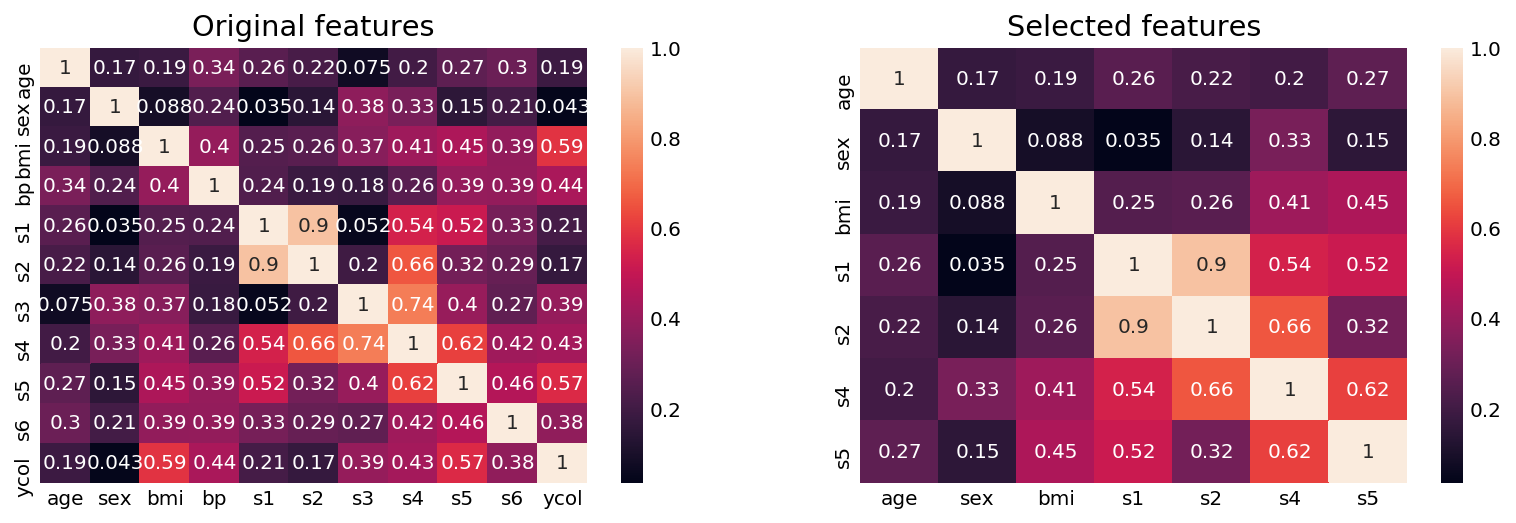

In [142]:
df, X, y, X_train, y_train, X_test, y_test = regression()

# Create correlation matrix
corrs = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.3
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]

#create df with selected features
df_ = df.copy()
df_.drop(to_drop, axis =1, inplace = True)
print(f'Features to drop:{to_drop}')
corrs_ = df_.corr().abs()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
sns.heatmap(corrs, ax=ax1, annot=True)        # Plot heatmap
ax1.set_title("Original features")
sns.heatmap(corrs_, ax = ax2, annot=True)# Plot heatmap
ax2.set_title("Selected features")


    - Variance thresholds  
    Eliminate any feature where the majority of observations have the same/similar value. Low variance menas the feature carries little information
    (different from Co-variance)

In [164]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.99
thresholder = VarianceThreshold(threshold=.99)

# Conduct variance thresholding
X_high_variance = thresholder.fit_transform(X)

to_drop=thresholder.get_support(indices=True)

df_ = df.copy()
df_= df_.iloc[:,to_drop]
df_.head()

,sex,bp,s1,s2
0,0.050680,0.021872,-0.044223,-0.034821
1,-0.044642,-0.026328,-0.008449,-0.019163
2,0.050680,-0.005671,-0.045599,-0.034194
3,-0.044642,-0.036656,0.012191,0.024991
4,-0.044642,0.021872,0.003935,0.015596


- Models with built in feature selection
    - Lasso Regression (Unimportant features get a 0 coefficient)
    - Random forests/decisions trees (feature that do not add information get left out)

In [ ]:
#see feature seletion sections

    
## Cleaning

### Intitial Validation 

In [ ]:
# Check if the colums data types make sense
df.dtypes
#convert to ints to floats
df['col1'] = df['col1'].astype(np.float64) #or something else
# to string?
df['col2'] = df['col2'].astype(np.str)
#BTW
df[['col1','col2']] = df[['col1','col2']].astype(np.str) #also works



In [ ]:
df['col1'].unique() #will likely indicate problems
df.['col1'].value_counts # also does the trick

In [ ]:
#function looping over values for correction and type settting
def cleaner(x):
    x = x.replace('-','') #replace something at the same time
    try:
        return float(x) #forces float
    except:
        return np.nan
    
df['col1']= df['col1'].map(cleaner)
# df = df.apply(cleaner) will do the WHOLE data frame

In [ ]:
#or:
df['col1'] = df['col1'].map(lambda x: float(x))
#or
df.loc[:,'col1'] = df['col1'].map(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

Now we get into the difficult bit: 'Real' cleaning, namely Na/Null, outliers (including inconsistencies: e.g. a 3 year old owning a car) Consider: Size of the data set, use of the data, the purpose of the analysis. Scan the 'cleaned' data for patterns

In [ ]:
# create mask:
mask = df['col1'] == value # <>== etc
mask1 = ((df['col1']) > value) & (df['col2'] < value) #note brackets arround each condition
# view rows
df.loc[mask,:]
#or:
df.loc[df['col1'] == value]
#decide what to do: override the culprit:
df.loc[mask, 'col1'] = np.nan #or override the value
df.loc[mask, 'col1'] = new_value/new string
#or delete entire row
df = df.loc[~mask,:].reset_index(drop=True) 

In [ ]:
#signs that do not seem to be wanting to be deleted 
df[col] = df[col].astype(str)  # cast to string

# all the string surgery goes in here
df[col] = df[col].replace('$', '')
df[col] = df[col].replace(',', '')  # assuming ',' is the thousand's separator in your locale
df[col] = df[col].replace('%', '')

df[col] = df[col].astype(float)  # cast back to appropriate type

### Outliers

Wikipedia: "an outlier is an observation point that is distant from other observations"  
Considerations:
-  Purpose of the analysis
    - Predicting anomalies/Black Swans, e.g. detecting fraud:    
    outliers are a blessing
    - Predicting averages e.g. average house prices  
    It is a common practice to limit the dataset to the mean +/- 2 or 3 std's on key independent variables
-  Number of outliers vis a vis the quantity of data:  
    - 10000 observations with 3 outliers
    - 10000 observations with 500 outliers
-  Overall data quality
    - If overall quality of the data is low the more radical solutions are in order
-  Type of model likely to be applied, particularly distance based models are sensitive to outliers e.g.:
    - Regression 
    - Kmeans 
    

**note:** Categorical data may also have outliers: an 'outlier' category will have a frequency of a different magnitude than the others  (e.g. {FavoriteColorBlue : 1000, FavoriteColorRed :2000, FavoriteColorMauve: 5}

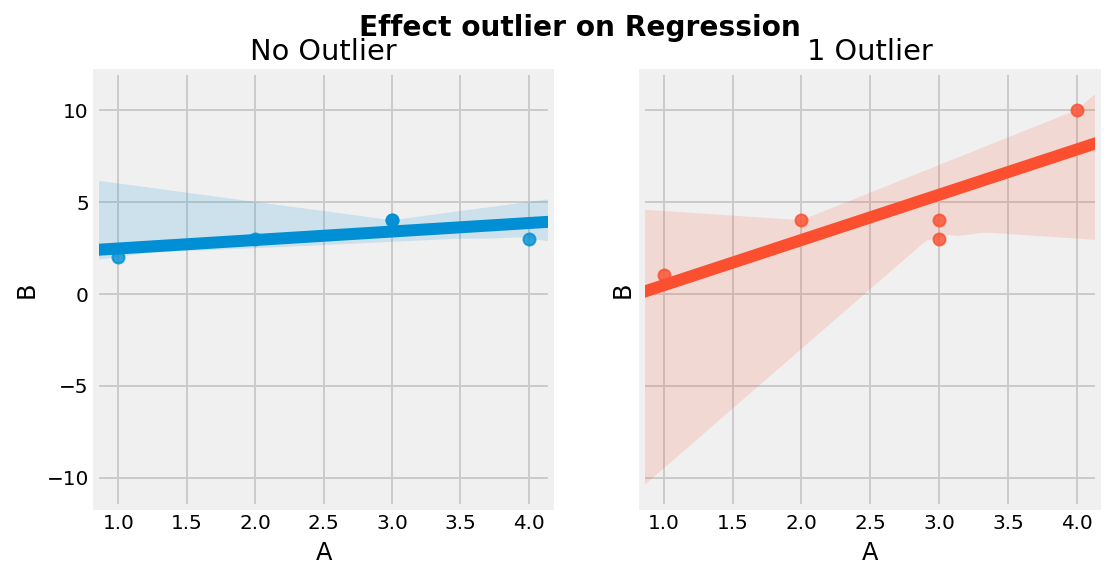

In [138]:
#Illustration of impact of outlier on simple regression
df_ = pd.DataFrame({'A': [1, 2, 3, 3, 4], 'B': [2, 3, 4, 4, 3]})
df = pd.DataFrame({'A': [1, 3, 2, 3, 4], 'B': [1, 3, 4, 4, 10]})
import seaborn as sns
fig, axs = plt.subplots(ncols=2,figsize=(8,4), sharey=True)

sns.regplot(x='A', y='B', data=df_, ax=axs[0])
axs[0].set_title("No Outlier")
sns.regplot(x='A', y='B', data=df, ax=axs[1])
axs[1].set_title("1 Outlier")
fig.suptitle('Effect outlier on Regression', fontsize=14, fontweight='bold')

plt.show()
# it took me 2 hours to figure out sns.lmplots cannot be subplotted

#### Identify outliers
##### Visually by plotting
##### Filtering
- Z scores
- Medians

##### More Advanced methodologies

- DBScan
- Isolation Forest

#### Establish the cause of the outlier
For all outliers the cause should be established. Or rather, error as a cause should be ruled out. Outliers should be 'presumed innocent until proven guilty'. Sources of error include:
    -  (Manual) Input error
    -  Error in interface/conversion
    -  Malfunction of the recording technology (chain)

##### Error

If an error is established:
1. Correct if possible
2. Treat as NaN

##### True outlier, aka 'Novelty'

Course of action is determined by the **purpose of the model/analysis** :

Remove records with outliers from the data set if:

- Focus on prediction of averages
- Overall data quality is poor anyway
- Susceptibility for outliers of the anticipated models

Retain them for:

- Anomaly detection and resulting anomaly prediction 

An alernative strategy is to mark outliers with a dummy; retain the original value or replace it with a mean, medium or mode. Make sure to include the outlier dummy in the X




In [60]:
# Approach using Mean/Std, good for (close to) normally distributed data
df = pd.DataFrame(data_prep)
# set values
avg = df['col2'].mean()
dev = df['col2'].std()
# set boundaries
outlmin = avg - 2 * dev
outlmax = avg + 2 * dev
#create mask
mask = (df['col2'] > outlmax) | (df['col2'] < outlmin) #() around each condition
#apply mask to DF
df = df[~mask].copy() #.copy helps avoiding error messages
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False


In [61]:
# InterQuartileRange approach, good for data not normally distributed
df = pd.DataFrame(data_prep)
df = df.dropna() #np.percentile does not like NaN

quartile_1, quartile_3 = np.percentile(df['col2'], [25, 75])
iqr = quartile_3 - quartile_1
# set boundaries
outlmin = quartile_1 - (iqr * 1.5)
outlmax = quartile_3 + (iqr * 1.5)

#create mask
mask = (df['col2'] > outlmax) | (df['col2'] < outlmin) #() around each condition
#apply mask to DF
df = df[~mask].copy() #.copy helps avoiding error messages
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False


In [62]:
df = pd.DataFrame(data_prep)
# 1 sided outlier elimination, pandas way
df[df['col2'] < 3 * df['col2'].mean()]


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False


In [63]:
df = pd.DataFrame(data_prep)
# 2 sided outlier elimination, pandas way
df[(df['col2'] < df['col2'].mean() + 2 * df['col2'].std()) | (df['col2'] > df['col2'].mean() - 2 * df['col2'].std())]

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


### Isolation Forest

Eliminating outliers in multi dimensional space. It labels a desired fraction ('contamination') of the dataset as outlier, which may be inspected and deleted. It may perform better compared to manual individual row inspection. Outlier elimination takes place on the full data set.(https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)

In [67]:
#get the data ready
df, X, y, X_train, y_train, X_test, y_test = multiclass()

from sklearn.ensemble import IsolationForest
# training the model
outliers_fraction = 0.05
outlier_clf = IsolationForest(max_samples=100, contamination = outliers_fraction, random_state=42)
outlier_clf.fit(X)

# predictions - mark the outliers
df['forest_outlier'] = outlier_clf.predict(X)
#select outliers
df[df['forest_outlier'] == -1]#.sample(5)

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ycol,forest_outlier
13,4.3,3.0,1.1,0.1,0,-1
15,5.7,4.4,1.5,0.4,0,-1
41,4.5,2.3,1.3,0.3,0,-1
109,7.2,3.6,6.1,2.5,2,-1
117,7.7,3.8,6.7,2.2,2,-1
118,7.7,2.6,6.9,2.3,2,-1
122,7.7,2.8,6.7,2.0,2,-1
131,7.9,3.8,6.4,2.0,2,-1


In [69]:
# eliminate outliers
mask = df['forest_outlier'] == 1
df_ = df[mask]
print(f'The shape of the dataframe with {outliers_fraction} outliers eliminated is: {df_.shape}')

The shape of the dataframe with 0.05 outliers eliminated is: (142, 6)


In [74]:
#alternative method (https://chrisalbon.com/machine_learning/preprocessing_structured_data/detecting_outliers/)
from sklearn.covariance import EllipticEnvelope

outliers_fraction = 0.05

# Create detector
outlier_clf = EllipticEnvelope(contamination=outliers_fraction)

# Fit detector
outlier_clf.fit(X)

# Predict and mark outliers

df['envelop_outlier'] = outlier_clf.predict(X)

#select outliers
df[df['envelop_outlier'] == -1].sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ycol,forest_outlier,envelop_outlier
114,5.8,2.8,5.1,2.4,2,1,-1
122,7.7,2.8,6.7,2.0,2,-1,-1
141,6.9,3.1,5.1,2.3,2,1,-1
134,6.1,2.6,5.6,1.4,2,1,-1
131,7.9,3.8,6.4,2.0,2,-1,-1


In [72]:
# eliminate outliers
mask = df['envelop_outlier'] == 1
df__ = df[mask]
print(f' the shape of the data farme with {outliers_fraction} outliers eliminated is: {df__.shape}')

 the shape of the data farme with 0.05 outliers eliminated is: (142, 7)


In [ ]:
#also look at radius knn

### Missing data

Considerations:

-  Volume of the data
-  Origin/nature of the data (e.g. sample of tweets  vs a scientific experiment)
-  Phase in the modeling process(e.g. initial stages vs final feature selection)
-  Are NaN's likely to occur in production?

Essentially 3 strategies. 
1.  Dropping  
Common 'Big Data' approach. If data is ambundant. NaN's low in volume. During initial stage of the modeling.
2.  Imputing  
Traditional 'Small Data' approach. Low data volumes, NaN's low in volume
3.  Categorizing  
Considers the presence of NaN's to hold information by its virtue. Dropping or Imputing will lose this information. (e.g. certain age groups may be more hesitant to state their age. By dropping the records the specific age group may be underrepresented)

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for 'missingness', instead of just filling it in with the mean.
  
Additional advantage is that this makes a productionalized model more robust as it will allow for NaN's (e.g. even if somebody does in fill in her age the model can still predict)



#### Identify missing data



In [75]:
df = pd.DataFrame(data_prep)
df__ = df.isnull().sum(axis=1) # by index (by row in db terms)
df_ = df.isnull().sum() # by column
print(df__, df_)

0    1
1    0
2    0
3    0
4    2
5    0
6    0
7    0
8    1
9    0
dtype: int64 Col0     0
Col1     0
col2     2
col3     0
col4     0
col_a    0
col_b    1
colc     1
ycol     0
dtype: int64


Decide if there are other values that should be considered 'null' or NaN. These may include: '?', 999(as an integer), ' ' (space). In a wider sense: anything that is not appropriate for the purpose of variable. E.g. the variable 'sex' may include the answer 'yes, please!', although a KNN will likely impute in a 14 year old male, it is best to regard this joker as a np.NaN .
<br><br>
It may be tricky to identify these, check the data dictionary for valid data. If not available do a value count on objects (not for NLP obviously)

In [76]:
df['colc'].value_counts()

triangle    4
circle      2
square      2
???         1
Name: colc, dtype: int64

Numeric columns replace the identified missing values with np.NaN

For object columns, it is a little more tricky technically. For Python string operations do not like np.NaN's.
    1. identify missing values
    2. replace the strings with a generic string 
    3. convert generic string to np.NaN
    4. Convert column to integer/

### Dropna

The classic 'Big Data' approach; 

In [77]:
df = pd.DataFrame(data_prep)
# Dropping all rows with an(y) NA
df.dropna(axis=0)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [78]:
df = pd.DataFrame(data_prep)
# Dropping columns
df.dropna(axis=1)

,Col0,Col1,col3,col4,col_a,ycol
0,row1,1,-4,excellent,aaa,True
1,row2,2,-3,excellent,bbb,True
2,row3,3,-2,very good,ccc,True
3,row4,4,-1,very good,ddd,True
4,row5,5,0,good,eee,True
5,row6,6,1,good,fff,False
6,row_7,7,2,fair,ggg,False
7,row_8,8,Nan,fair,hhh,False
8,Row9,9,4,appalling,iii,False
9,Row10,10,5,appalling,jjj,False


Nifty trick: df.dropna(axis=1, thres=3), defines the acceptable number of NaN's along the axis

### Imputing
#### SKlearn Impute
Fits into pipelines

In [79]:
df = pd.DataFrame(data_prep)
# by column
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=10)
X = df[['col2']]
imp.fit(X)
df['col2'] = (imp.transform(X)) 
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,16.8,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,16.8,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [83]:
#by column
#from sklearn.impute import SimpleImputer #(in version .20)
from sklearn.preprocessing.imputation import Imputer
import numpy as np
imp = Imputer(missing_values='NaN', strategy='mean')
#Simpleimp = Imputer(missing_values='NaN', strategy='mean')
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.fit(X)
print(imp.transform(X))           

[[6.5 2. ]
 [6.  4. ]
 [7.  6. ]]


In [87]:
#categoricals : impute 1 column NaN with most frequent for the column
df = pd.DataFrame(data_prep)
df = df.fillna(df['colc'].value_counts().index[0])
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1,-4,excellent,aaa,red,triangle,True
1,row2,2,2,-3,excellent,bbb,blue,square,True
2,row3,3,3,-2,very good,ccc,green,square,True
3,row4,4,4,-1,very good,ddd,orange,circle,True
4,row5,5,triangle,0,good,eee,triangle,circle,True
5,row6,6,7,1,good,fff,purple,???,False
6,row_7,7,8,2,fair,ggg,white,triangle,False
7,row_8,8,9,Nan,fair,hhh,black,triangle,False
8,Row9,9,triangle,4,appalling,iii,brown,triangle,False
9,Row10,10,1e+02,5,appalling,jjj,gray,triangle,False


In [88]:
# All columns:
df = pd.DataFrame(data_prep)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,triangle,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,100.1,0,good,eee,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,100.1,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In SKLearn 0.20 a ChainedImputer will be included which has more advanced features, like using models for determining the best value for the NA

#### Pandas 
##### Fillna

In [89]:
df = pd.DataFrame(data_prep)
df.fillna(2) #fills with integer 2

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,2,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,2.0,0,good,eee,2,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,2.0,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [90]:
df = pd.DataFrame(data_prep)
df.fillna(method='ffill') #repeats last value before NaN

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,4.4,0,good,eee,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,8.8,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [91]:
df = pd.DataFrame(data_prep)
df.fillna(method='bfill') #repeats first value after NaN

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,square,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,6.6,0,good,eee,purple,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,100.1,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [92]:
df = pd.DataFrame(data_prep)
df['col2'] = df['col2'].fillna(df['col2'].mean()) # fill with mean for the column
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,16.8,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,16.8,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [93]:
df = pd.DataFrame(data_prep)
df[['col3', 'colc']].replace(['???', 'Nan'], np.nan, inplace=True)#replace strings with np.nan
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


#### Interpolation

In [94]:
df = pd.DataFrame(data_prep)
df['col3'] = df['col3'].astype(float)
df['col3'] = df['col3'].interpolate(axis=0)#, inplace=True)
df
#df.interpolate(axis=1, limit=2, inplace=True)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4.0,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3.0,excellent,bbb,blue,square,True
2,row3,3,3.3,-2.0,very good,ccc,green,square,True
3,row4,4,4.4,-1.0,very good,ddd,orange,circle,True
4,row5,5,NaN,0.0,good,eee,NaN,circle,True
5,row6,6,6.6,1.0,good,fff,purple,???,False
6,row_7,7,7.7,2.0,fair,ggg,white,triangle,False
7,row_8,8,8.8,3.0,fair,hhh,black,triangle,False
8,Row9,9,NaN,4.0,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5.0,appalling,jjj,gray,triangle,False


#### KNN Classifier/Regressor(or any other model for that matter)

It is very feasible to use a predictive model for imputation. Careful not to build a 'model on a model' KNN is a likely (but slow) candidate. In fact it can be done with any other predictor other than Tarot cards. Outline is as follows:
    1. Split the df in 2 parts:
        1. With the NaN's
        2. Without the NaN's
    2. Define your y as the missing values column
    3. Define X as the columns to use for prediction. Make sure to **not include** i.e. **exclude** the ultimate target
    4. In case of a classifier: determine the baseline i.e. the largest majority class
    5. Scale your X
    6. Fit the model (use CrossVal, GridSearch as deemed appropriate for the purpose)
    7. Evaluate the model (R^2 or compare to baseline)
    8. Decide what to do
        1. Take the mean/median for continuous data
        2. Take the mode for discrete
    9. Predict the NaN's
    10. merge the 2 df's again
Good solution if missing value can be easily derived
    
    

In [95]:
df_imp = pd.read_excel('ImputKnn.xls',na_values='NaN')
df_imp

,col1,col2,col3,col4,col5,col6
0,10.0,4,4,6,90,1
1,10.0,4,5,6,100,1
2,NaN,4,5,6,90,1
3,10.0,7,8,9,100,0
4,20.0,4,5,6,90,0
5,20.0,7,8,8,102,0
6,20.0,7,8,8,90,1
7,NaN,7,8,9,106,1
8,20.0,11,12,13,100,1
9,30.0,14,15,16,90,0


In [96]:
#Split df on NaN's
impute_missing = df_imp.loc[df_imp['col1'].isnull(), :]
impute_valid = df_imp.loc[~df_imp['col1'].isnull(), :]

In [97]:
#define pred columns
pred_cols = [c for c in impute_valid.columns if not c in ['col6', 'col1']]
y = impute_valid['col1'].values
X = impute_valid[pred_cols]

In [98]:
#train model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
ss = StandardScaler()
Xs = ss.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
scores = cross_val_score(knn, Xs, y, cv=2)
print (scores)
print (np.mean(scores))

[0.66666667 0.6       ]
0.6333333333333333


In [99]:
#fit on valid and predict missing
knn.fit(Xs,y)
y = impute_missing['col1'].values
Xp = impute_missing[pred_cols]
ss = StandardScaler()
Xp = ss.fit_transform(Xp)

In [100]:
#impute missing
impute_missing['col1'] = knn.predict(Xp)
df_imp.loc[df_imp['col1'].isnull(), 'col1'] = impute_missing['col1']
df_imp

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,col1,col2,col3,col4,col5,col6
0,10.0,4,4,6,90,1
1,10.0,4,5,6,100,1
2,10.0,4,5,6,90,1
3,10.0,7,8,9,100,0
4,20.0,4,5,6,90,0
5,20.0,7,8,8,102,0
6,20.0,7,8,8,90,1
7,10.0,7,8,9,106,1
8,20.0,11,12,13,100,1
9,30.0,14,15,16,90,0


### Categorizing

Considers that the occurance of a NaN may hold information by itself. 

-  Introducing a category "missing" for categorical data.
-  introduce a dummy 'missing' per column with missing integers. Put the value to 1 for missing and 0 for valid entires. Include the 'missing' column in your X

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for 'missingness', instead of just filling it in with the mean.
  
Additional advantage is that this makes a productionalized model more robust as it allows for a value to be missing.


In [171]:
#example forthcoming 

#part of the 0.21 release, currently in development

# from sklearn.preprocessing import MissingIndicator
# X = np.array([[-1, -1, 1, 3],
#                [4, -1, 0, -1],
#                [8, -1, 1, 0]])
# indicator = MissingIndicator(missing_values=-1)
# mask_missing_values_only = indicator.fit_transform(X)
# mask_missing_values_only


### The opposite of Missing Data
#### Functional
It is also possible that there is 'too much' data. 

In [101]:
df = pd.DataFrame(data_prep)
df = df.append(df.iloc[[4,7]]) #create duplicates
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [102]:
# Dropping duplicate rows
df.drop_duplicates()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


Multiple entries in the same category/period. In combination with targeted/grouped sorting and, possibly, a temporary helper column, using drop_duplicated(keep = 'first') or 'last' may lead to single entries.
<br><br>
Argmax over the columns

In [ ]:
#forthcoming
example #rename column 
dfc['testcat'] = 'ReadComp'
#create a helper column, to ID the cases that a pupil has taken the test more than once 
dfc['helper'] = dfc['name']+dfc['DL']#Only include the last test result
dfc.drop_duplicates(subset='helper', keep='last', inplace = True)
#delete helper
dfc.drop(['helper'], axis=1, inplace=True)

#### Non-Functional

If you have an enormous dataset which cripples you computer, it is perfectly fine to take a random sample; you can/should always validate based on the entire dataset later; or get your AWS set up going

In [103]:
df_sample = df.sample(5)
df_sample

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
5,row6,6,6.6,1,good,fff,purple,???,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False


### Exploring relationships

Relationships are explored for 2 reasons:

1. Strong relationships (>0.90) between/among  independent  variables indicate co-variance, inspect and delete one if there is indeed covariance.

2. Between the dependent variable and independent variables to establish the relationship between the two. i.e. Whether there is any explanatory relationship.  
Prior to embarking consider/contemplate/research the theory on what relationships may be expected. Define the 'hypothesis'. Within a heatmap of a large feature set there $will$ be stronger and weaker relationships which may be meaningless. Confirm the expected  relationships through the heatmap and inspect the background on newly found ones. If they make no sense: consider them 'noise' and ignore them, by removal.
In a large feature space a threshold may also be set to only include variables with a high(er) correlation to the target.



Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


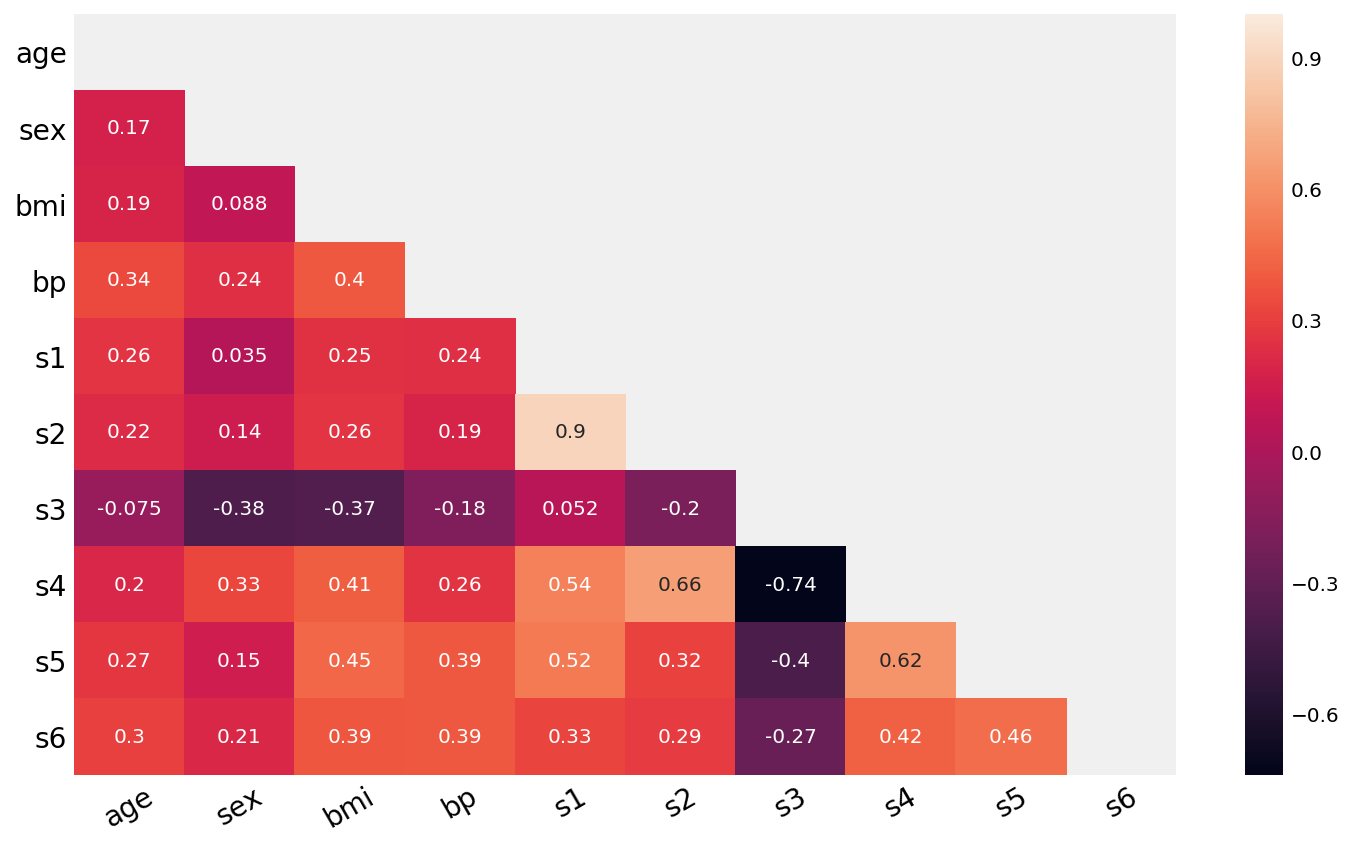

In [20]:
#get the data ready
df, X, y, X_train, y_train, X_test, y_test = regression()

corrs = X.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(11,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True) #with numbers
#ax = sns.heatmap(corr, mask=mask, ax=ax) #withoutnumbers
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.    
plt.show()

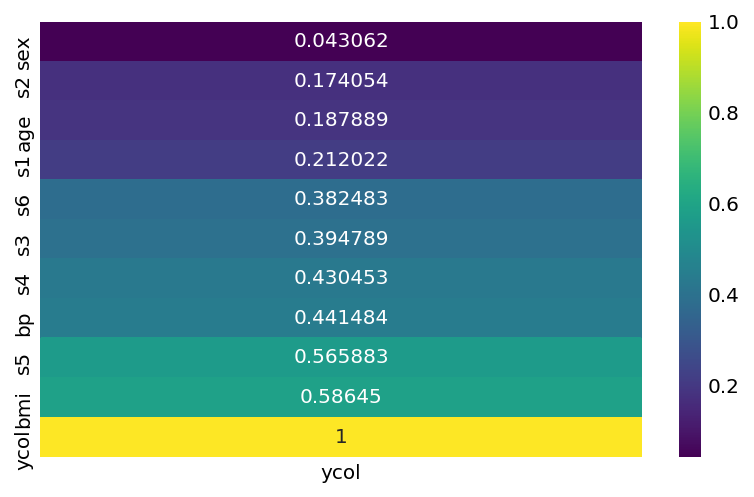

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corrs = df.corr()

sns.heatmap(abs(corrs[['ycol']]).sort_values(by='ycol'), annot=True, fmt="g", cmap='viridis');



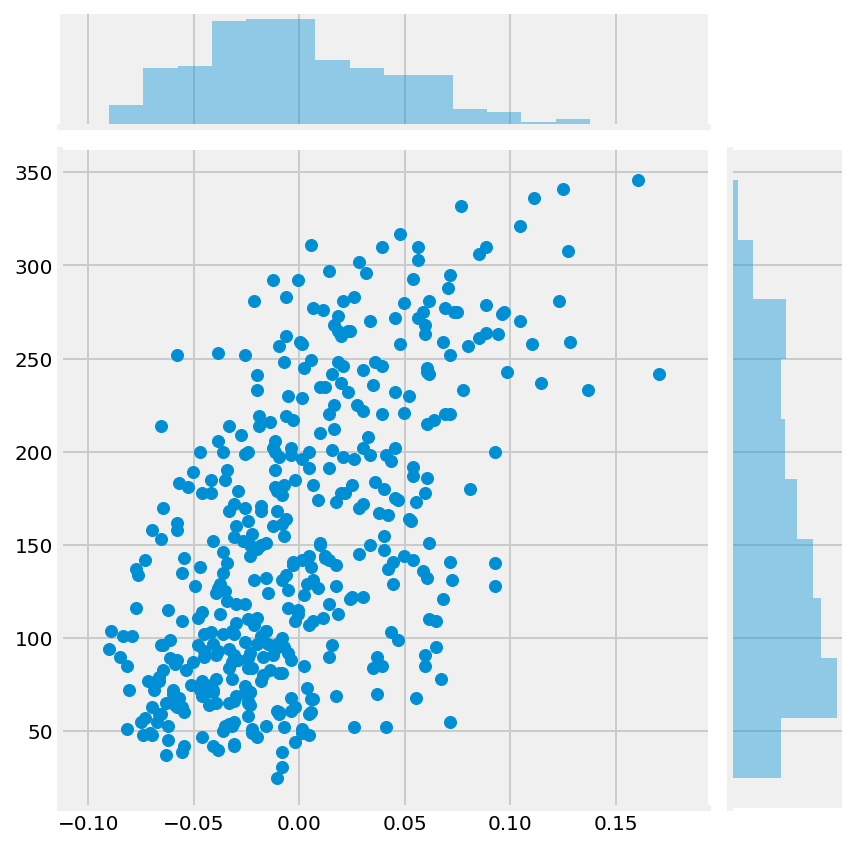

In [105]:
#for a simple model plot each Xcol to y(ensuring linear relation)
sns.jointplot(df['bmi'].values, y)
# sns.jointplot(df[[c for c in df.columns if not c in ['col1', 'col2']]].values, y)
# sns.jointplot(df[[c for c in df.columns if c.startswith('XyZ)].values, y)

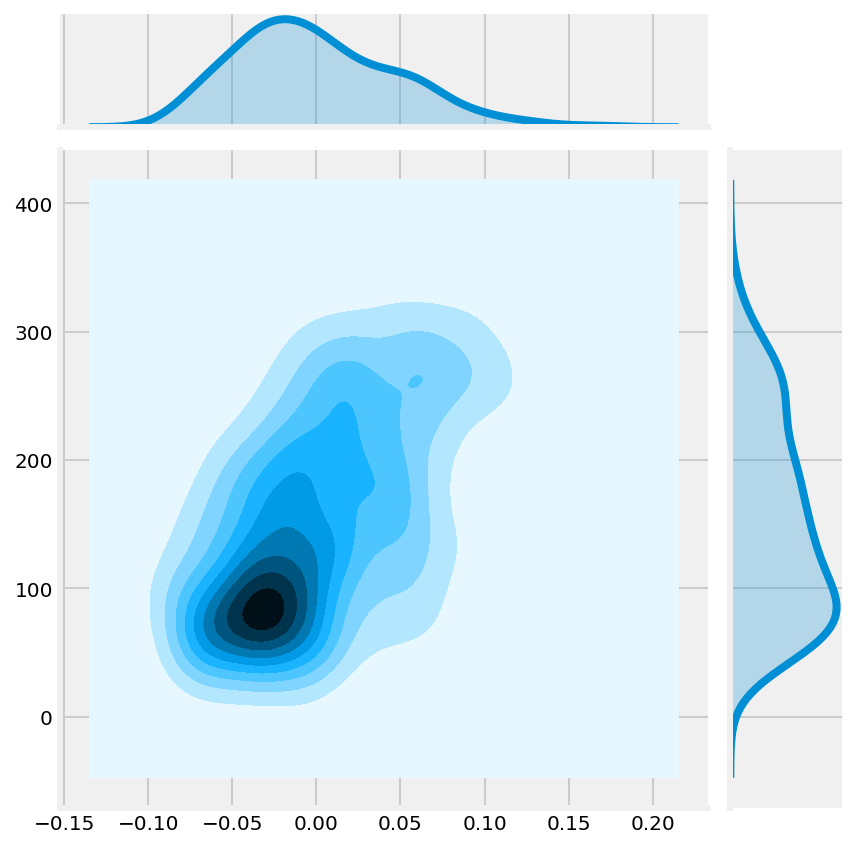

In [106]:
sns.jointplot(df['bmi'].values, y, kind='kde');

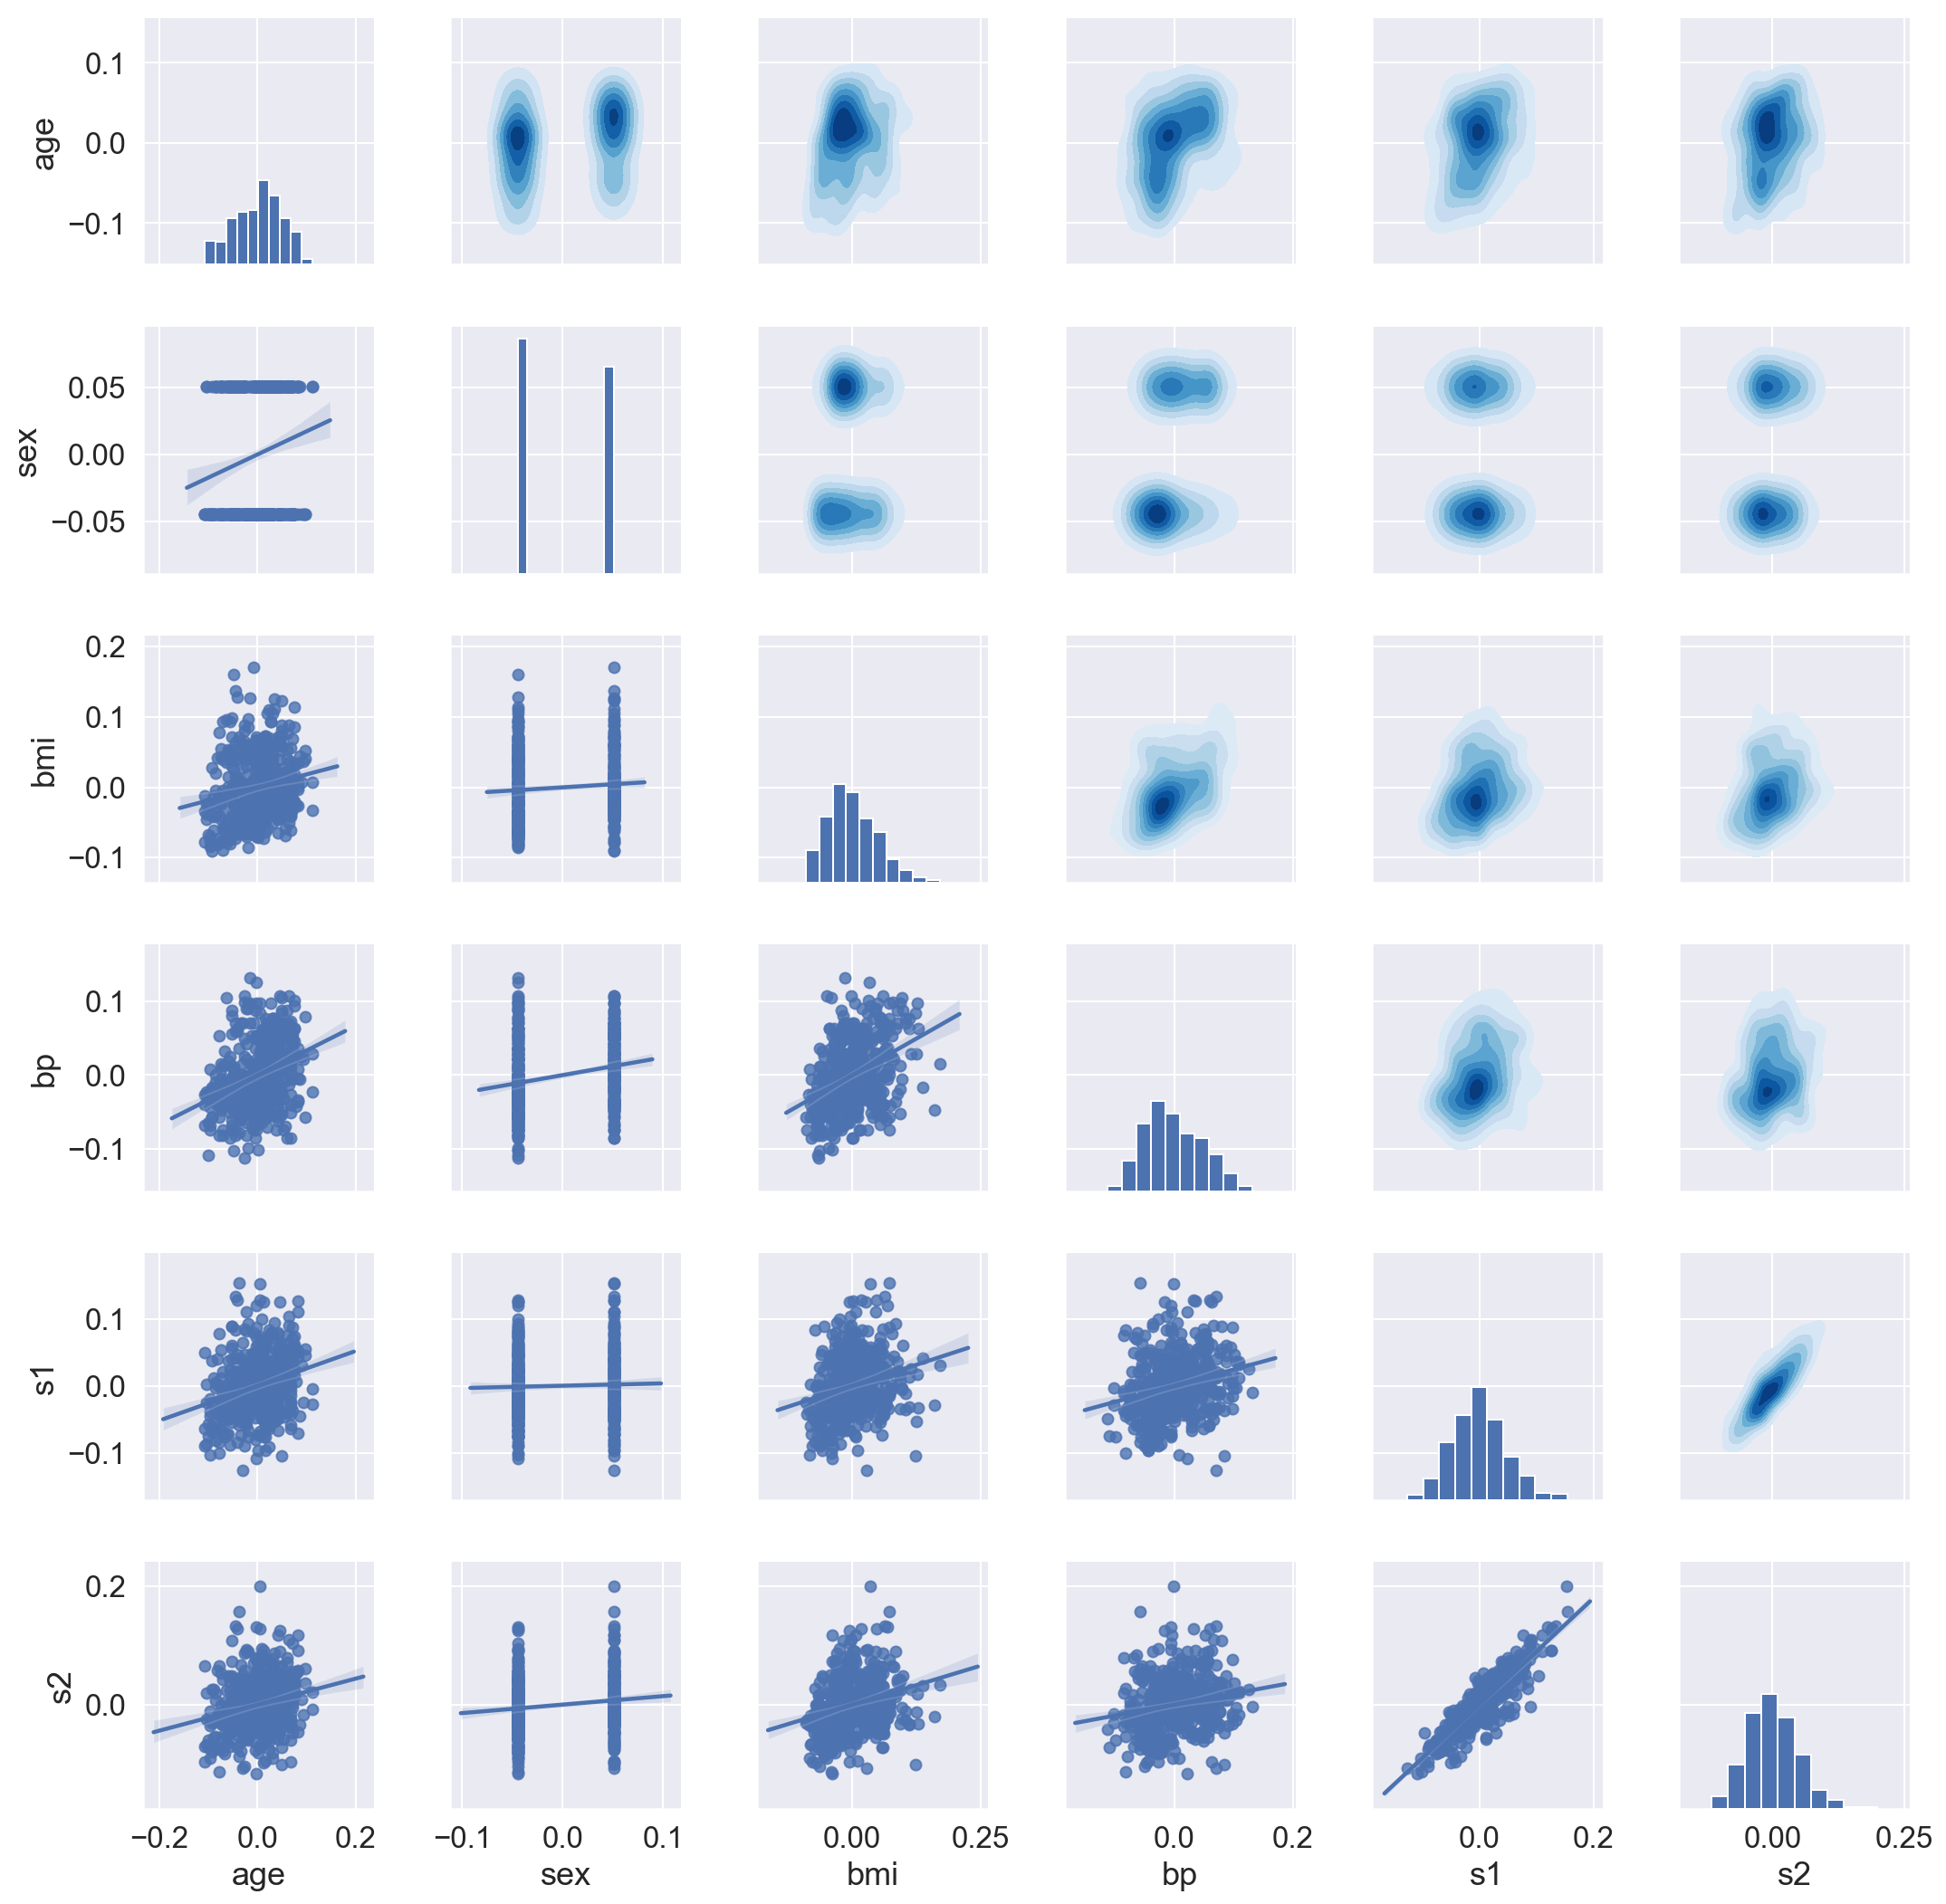

In [112]:
#or more fancy:
sns.set(font_scale=1.5)
g = sns.PairGrid(df[['age','sex','bmi','bp','s1','s2']]) # or 
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

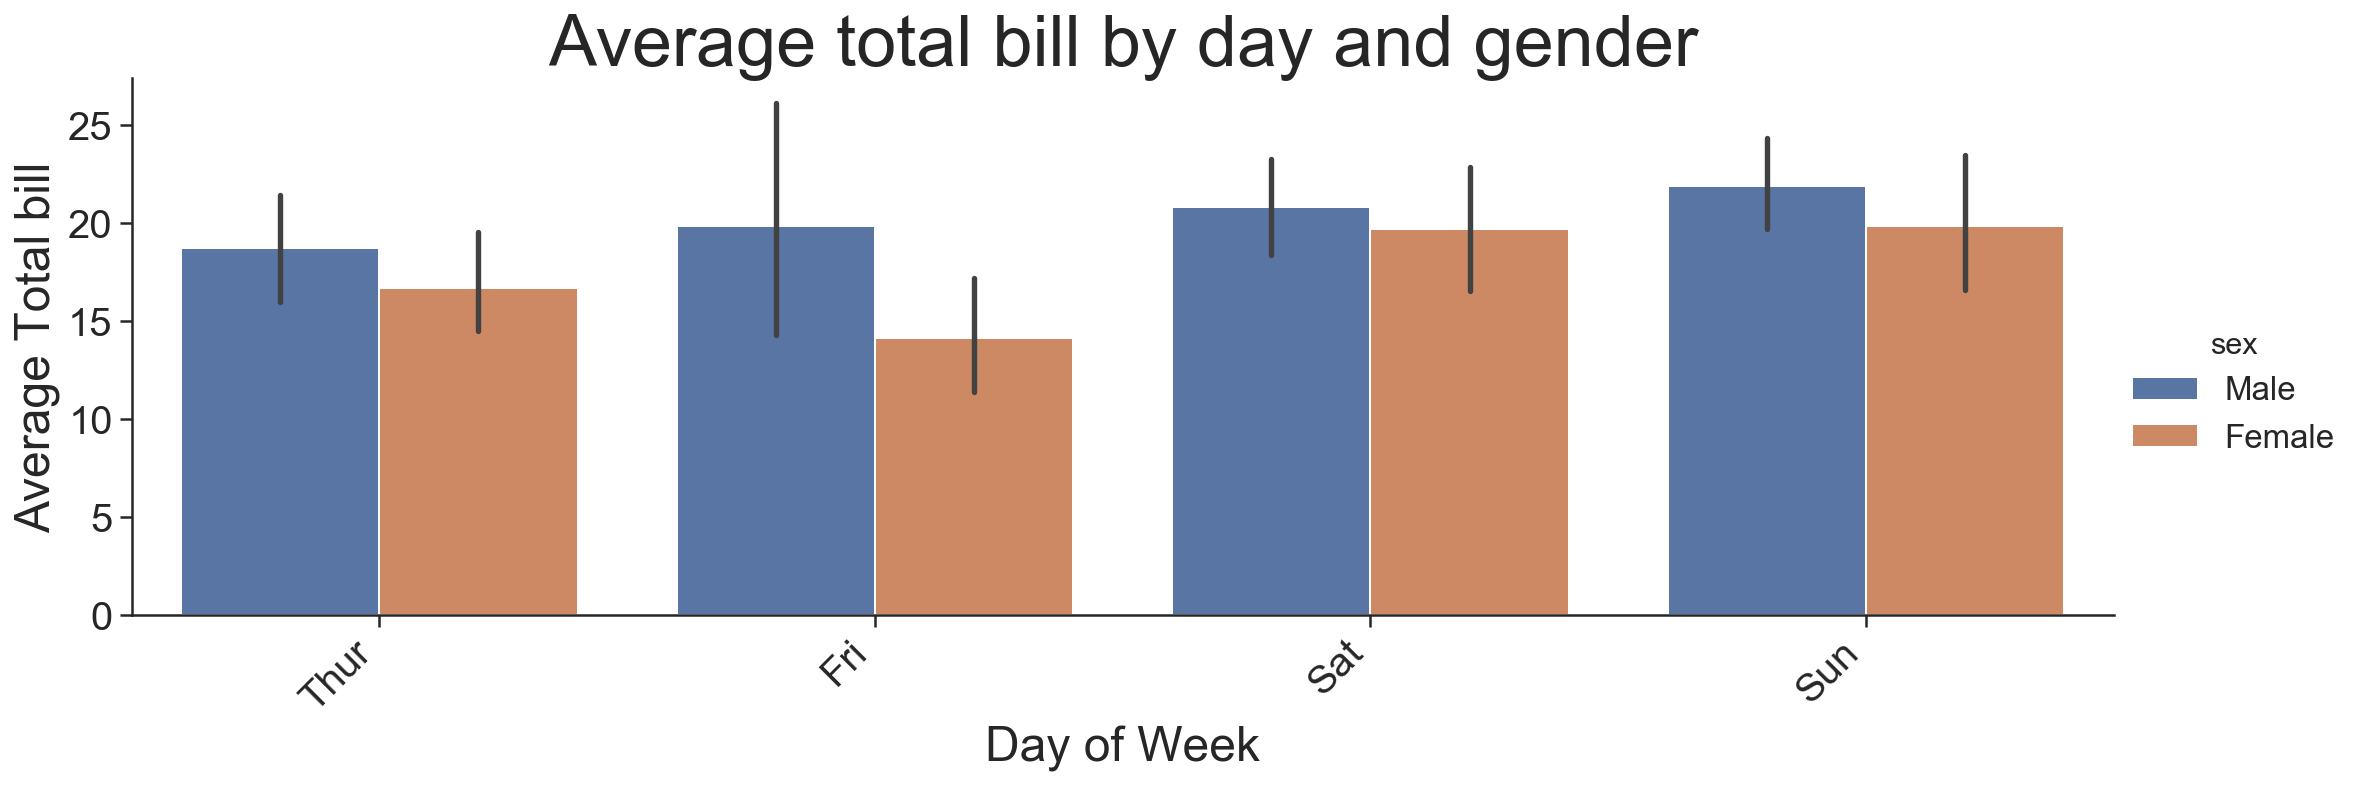

In [114]:
tips = sns.load_dataset('tips')
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind='bar', aspect=3)
    g.set_axis_labels("Day", "Total Bill");
    g.set_xticklabels(rotation=45, horizontalalignment='right',
              fontsize=20).set_yticklabels(fontsize=20)
plt.xlabel('Day of Week',fontsize=24)
plt.ylabel('Average Total bill',fontsize=24)
plt.title('Average total bill by day and gender', fontsize=36)
plt.show()

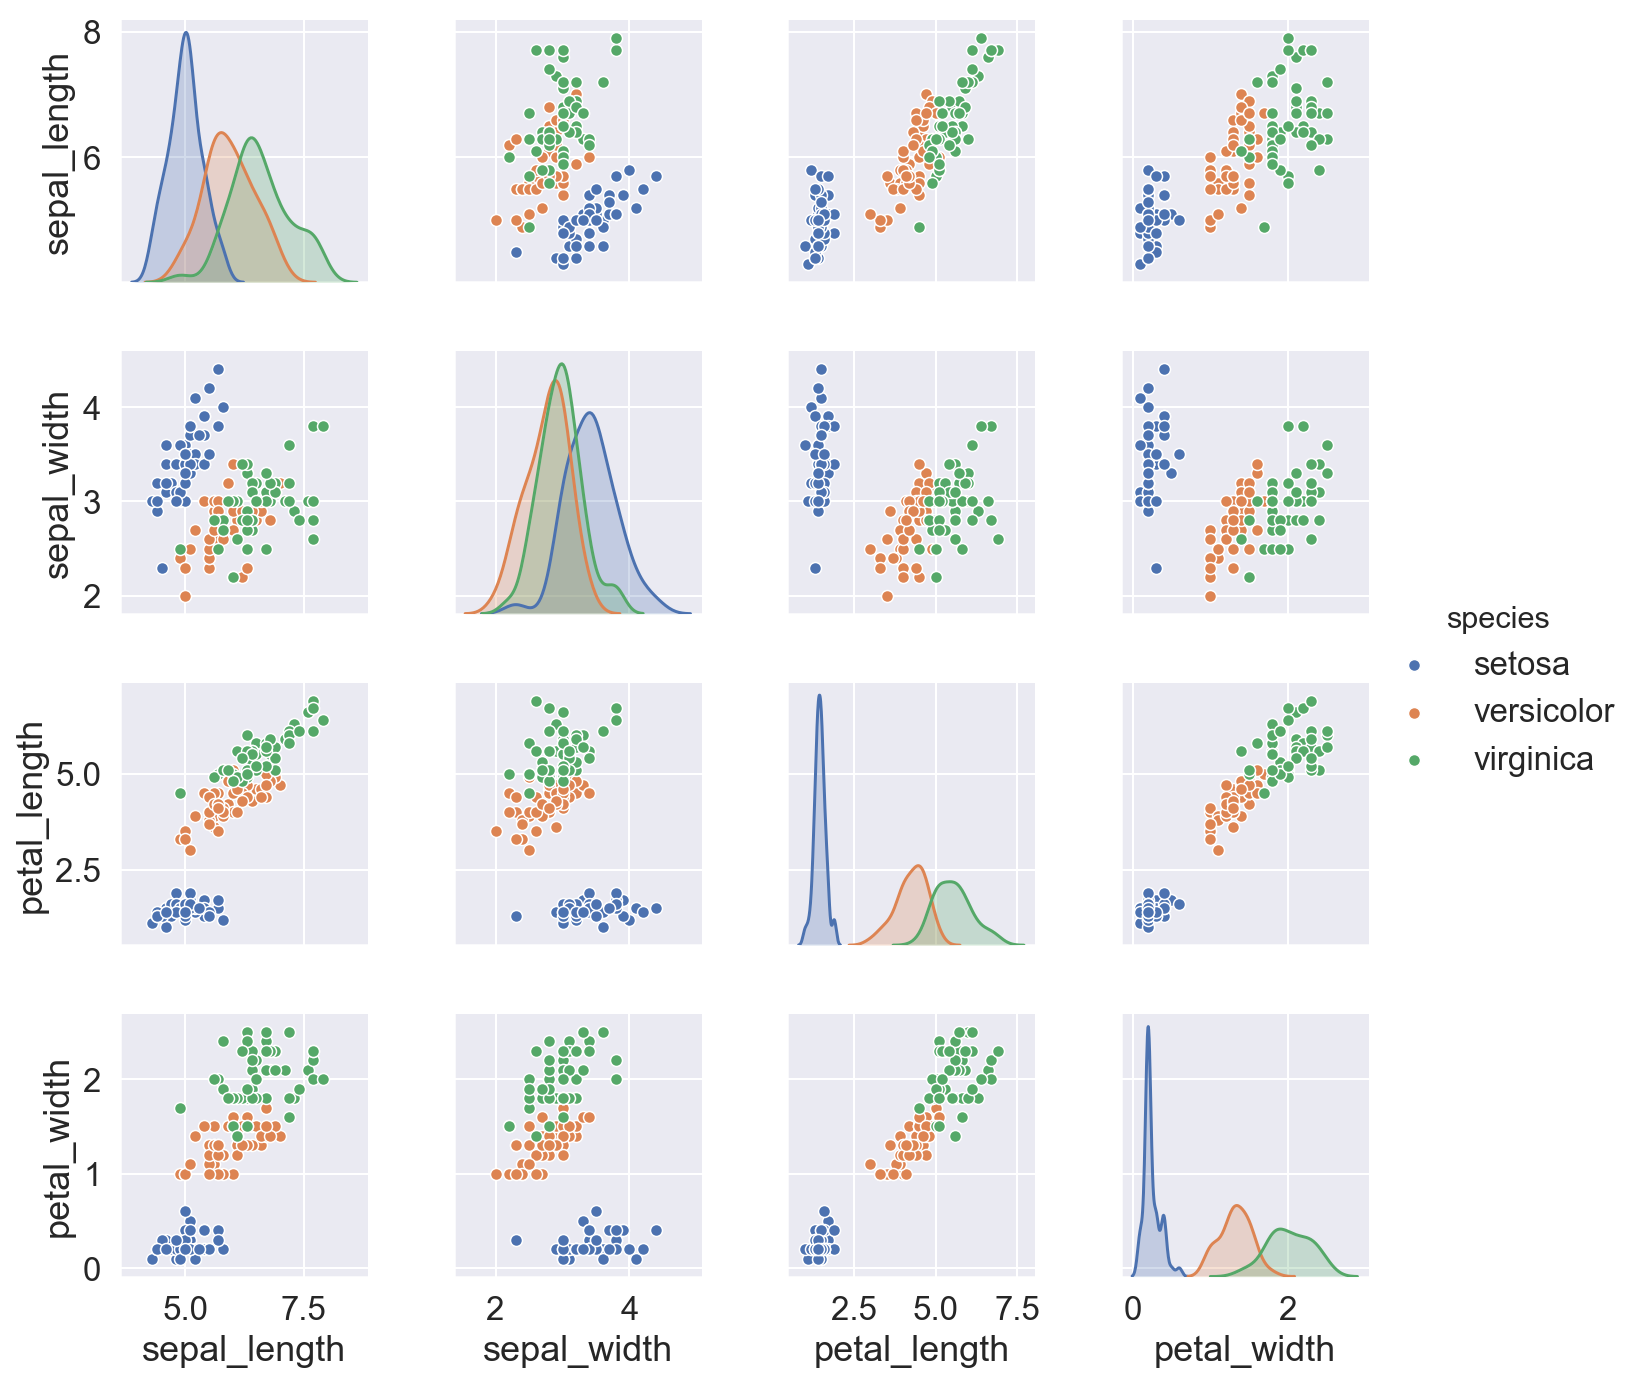

In [116]:
#pair plot with hue can be useful:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

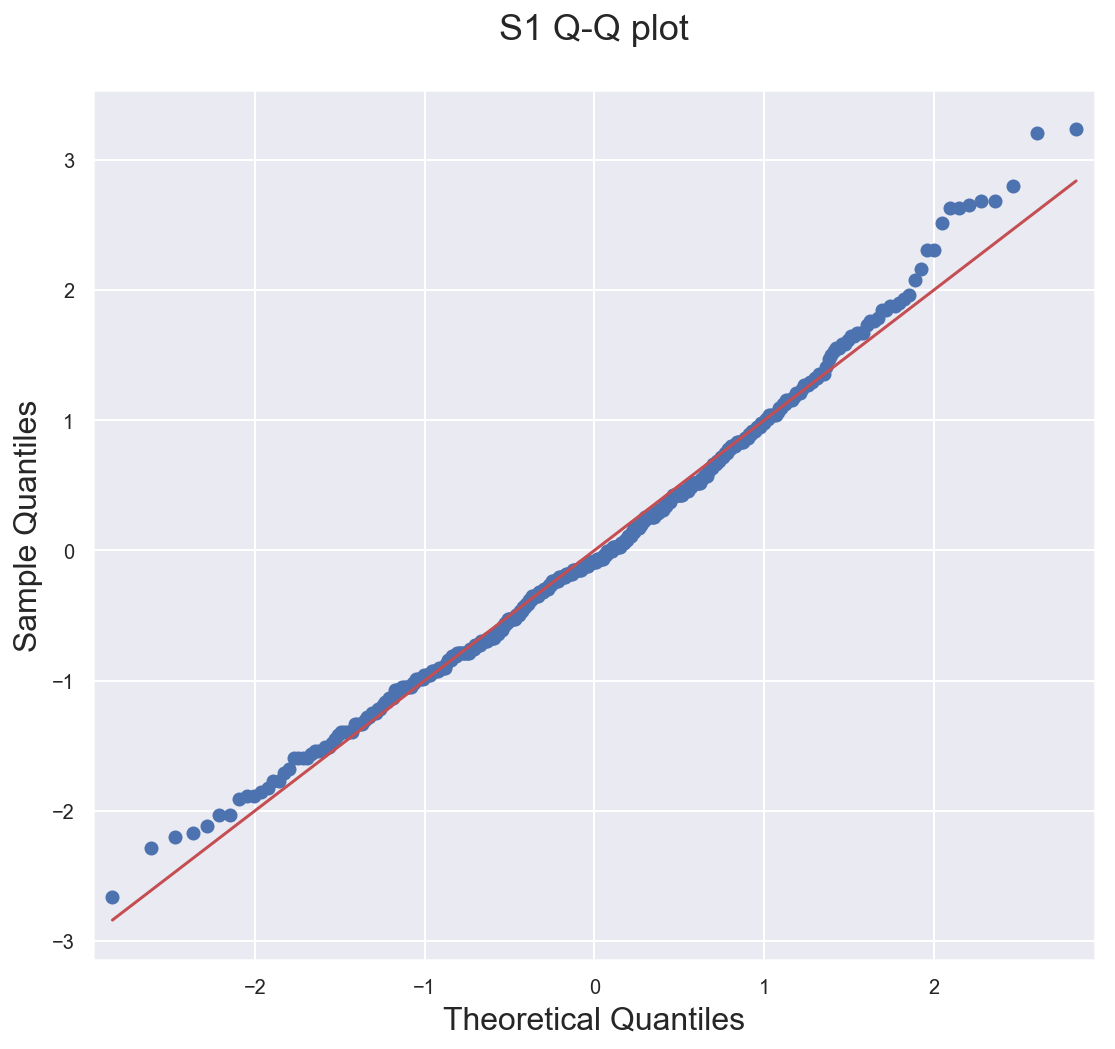

In [117]:
#Q-Q-Plot Check for Normal Distribution
import statsmodels.api as sm
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
sm.qqplot(df['s1'], line='s', fit=True, ax=ax)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Sample Quantiles', fontsize=16)
ax.set_title(f"S1 Q-Q plot\n", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

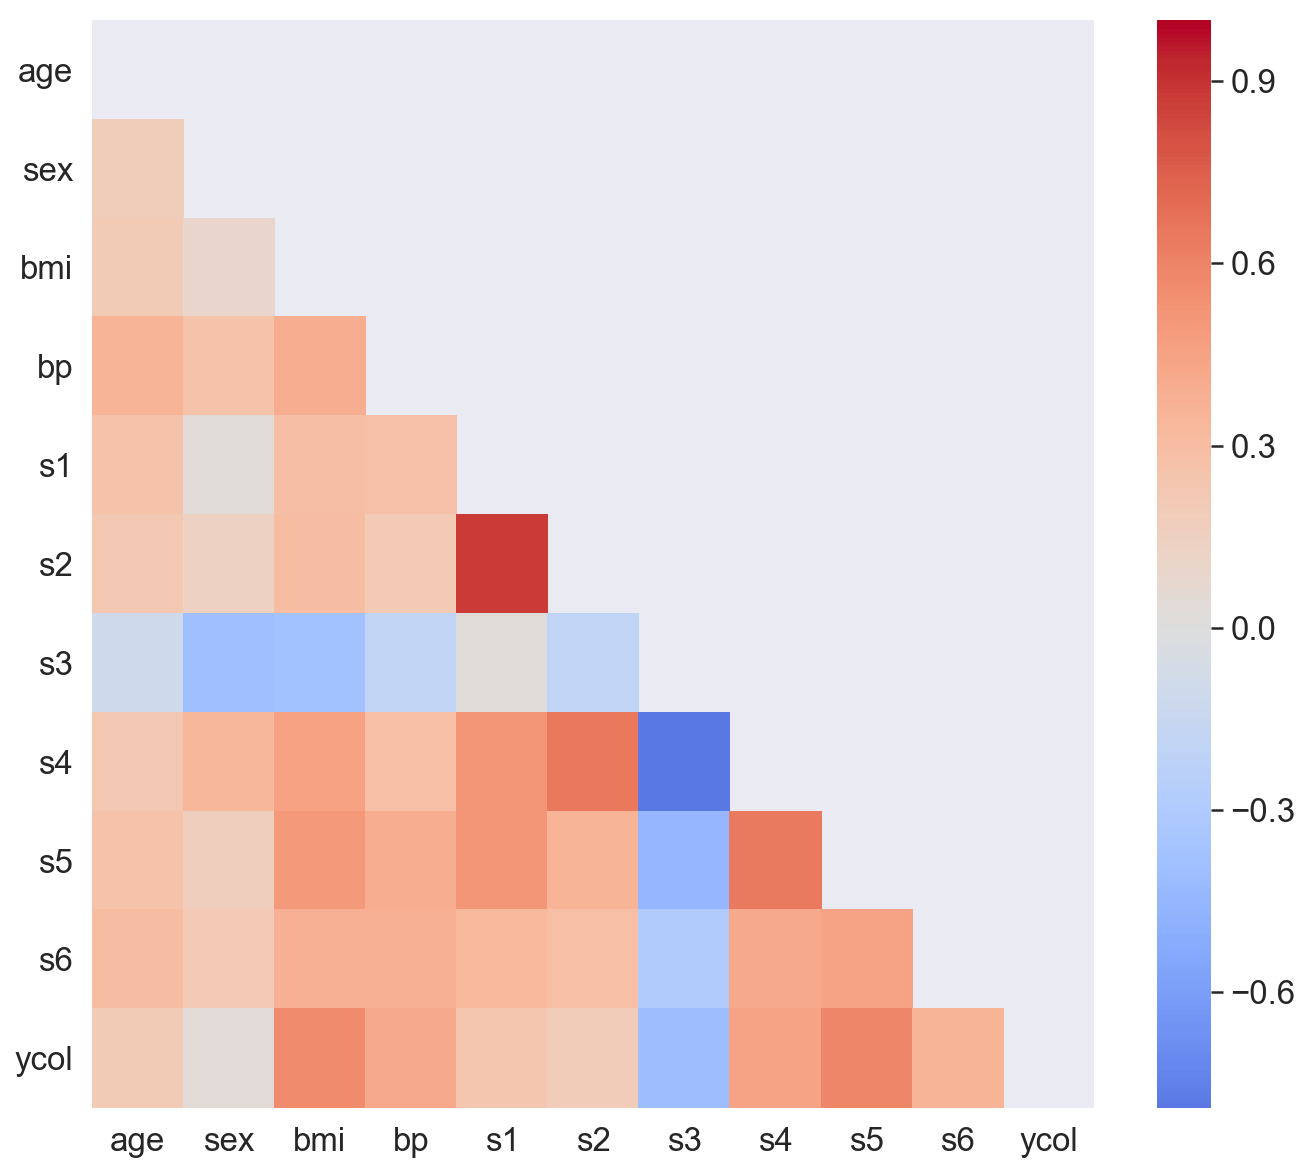

In [118]:
#prettier heatmap
fig, ax = plt.subplots(figsize=(10,10))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(method='spearman'), mask=mask, ax=ax, cmap='coolwarm', center=0) #withoutnumbers
#sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', center=0, annot=True, mask=mask) # with numbers
plt.yticks(rotation=0);

## Non-linear

Non linear relationships are sometime difficult to detect. Typically theory gives reason to belief.

In [125]:
#get dataset with non linear data
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(data, sep='\s+', names=['mpg','cylinders','displacement','horsepower','weight','acceleration',
                 'model year','origin','car name'])
#replace '?' with np.nan, drop null values, convert column to numeric
df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan
df = df.dropna().copy()
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
#Apply if wanted:
#df['origin'] = df['origin'].map(lambda x: 'USA' if x==1 else 'Europe' if x==2 else 'Asia')

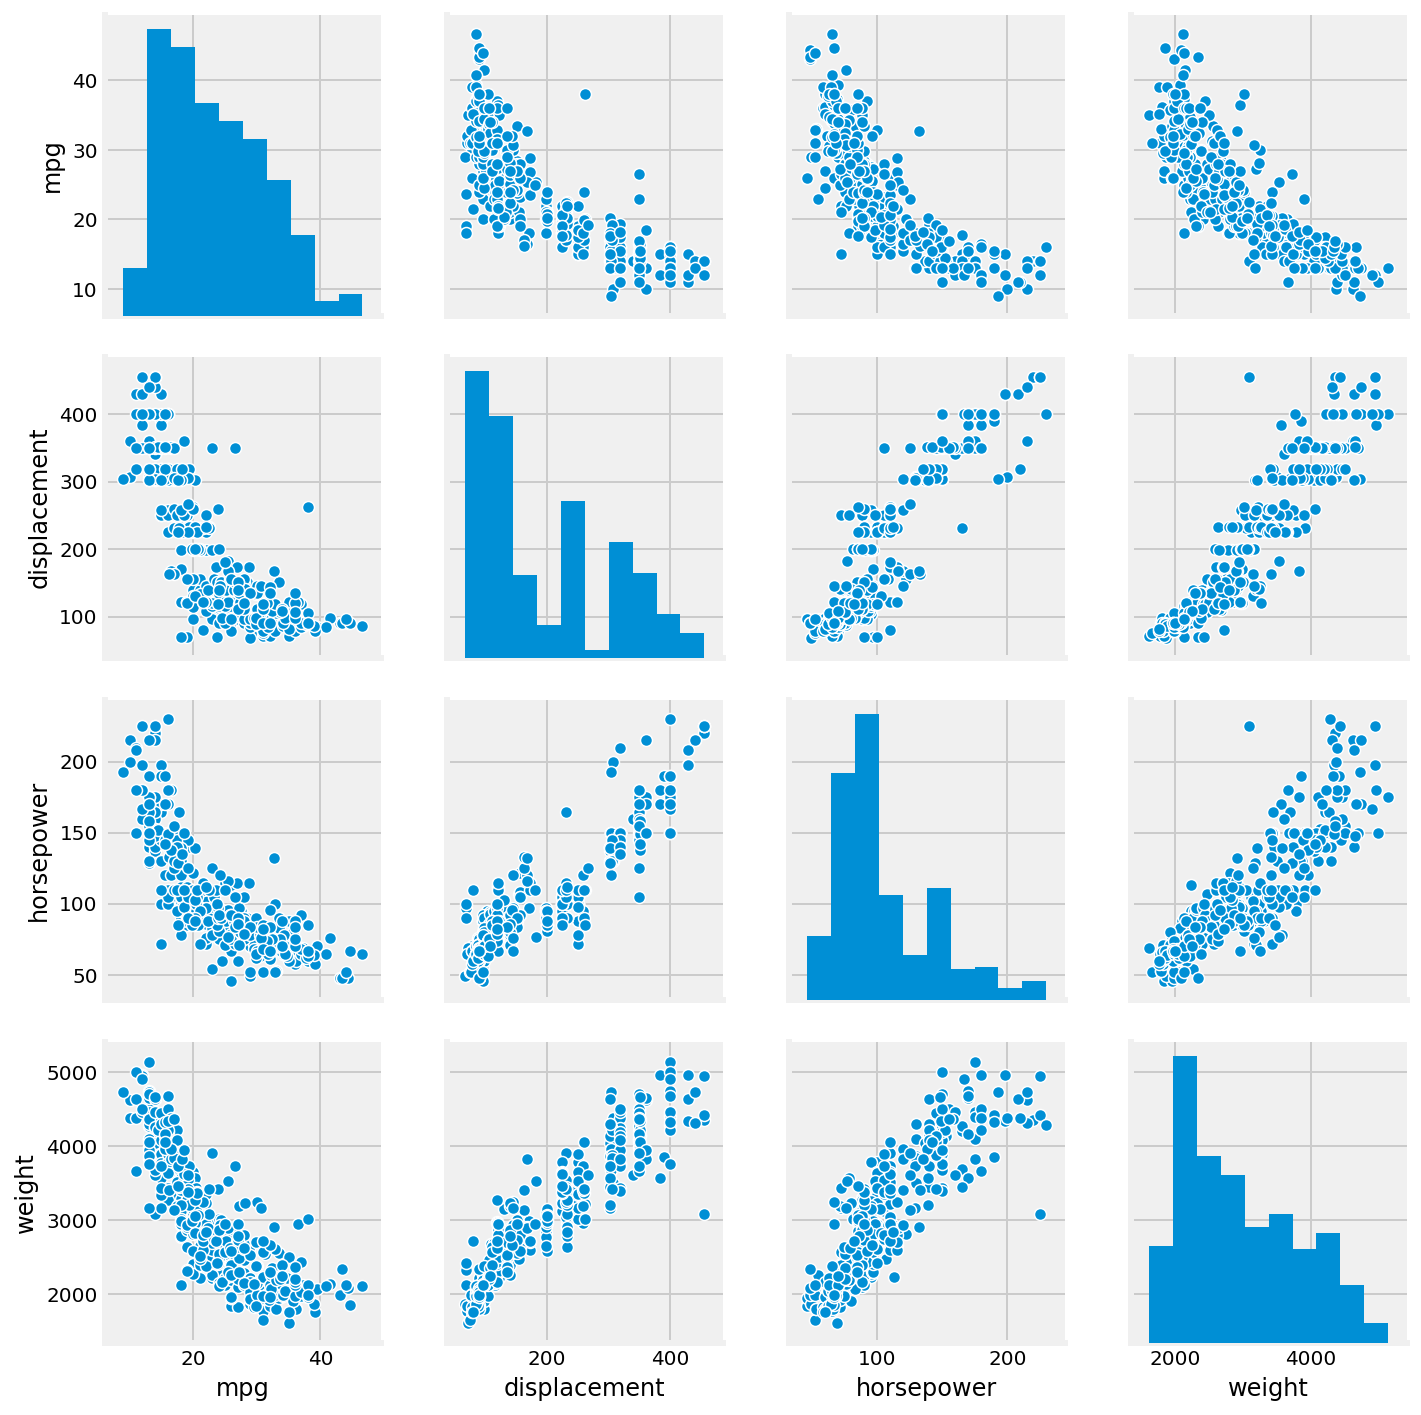

In [131]:
#make a pairplot of 'mpg'n'displacement','horsepower' and 'weight'
sns.pairplot(df[['mpg', 'displacement','horsepower','weight']]);

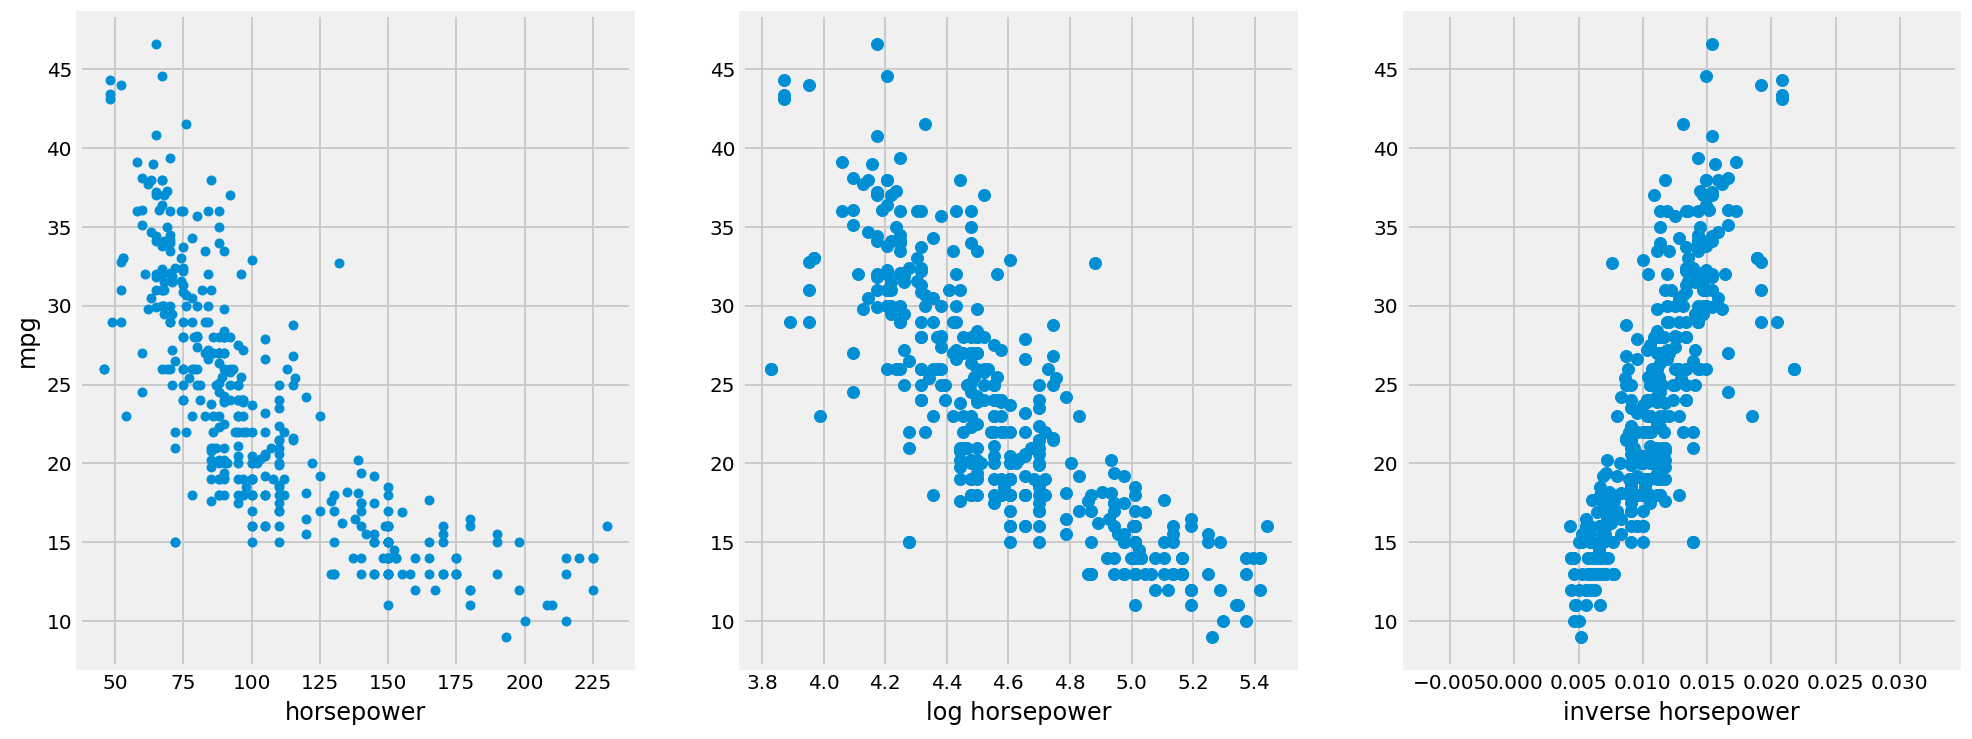

In [147]:
## Investigating just the relationship between mpg and horsepower, log horsepower, and inverse horsepower:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
df.plot.scatter(x='horsepower',y='mpg', ax=ax[0])
ax[1].scatter(np.log(df['horsepower']), df['mpg'],)
ax[1].set_xlabel('log horsepower')
ax[2].scatter(1/df['horsepower'], df['mpg'])
ax[2].set_xlabel('inverse horsepower');

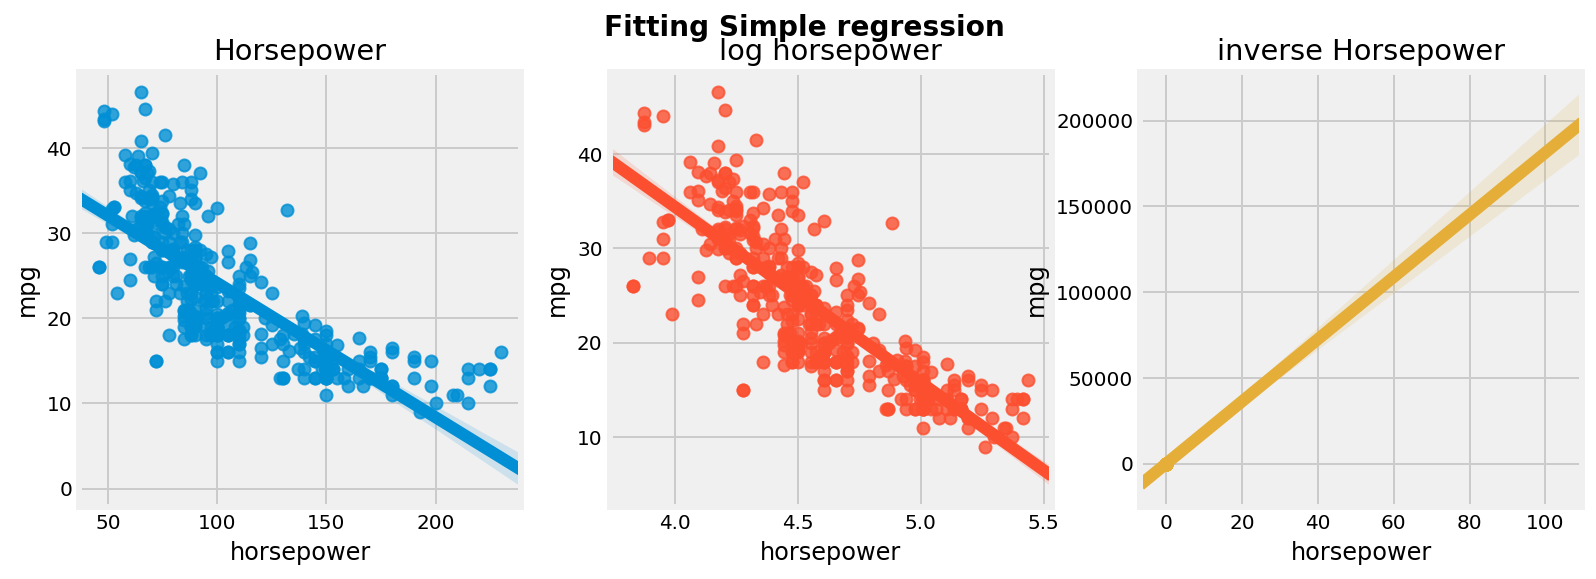

In [148]:
fig, axs = plt.subplots(ncols=3,figsize=(12,4))
sns.regplot(x=df['horsepower'], y=df['mpg'], data=df, ax=axs[0])
axs[0].set_title("Horsepower")
sns.regplot(x=np.log(df['horsepower']), y=df['mpg'], data=df, ax=axs[1])
axs[1].set_title("log horsepower")
sns.regplot(x=1/df['horsepower'], y=df['mpg'], data=df, ax=axs[2])
axs[2].set_title("inverse Horsepower")
fig.suptitle('Fitting Simple regression', fontsize=14, fontweight='bold')

plt.show();

# Modeling
## Model selection

![](https://scikit-learn.org/stable/_static/ml_map.png)


## Preprocessing

Data will need to be preprocessed for the models to work. Essentially all text needs to be transformed to integers for the models to work. The applies to language as well as categorical data. Although not all models require it, it is best practice to scale the X data. In some cases normalization is required.  
**Notes**   
Text cleaning is considered data cleaning.  
While some SKlearn models will handle NaN's and for quick and dirty prototyping this can be acceptable. Complete data cleaning is assumed here.

### Text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

english = stemmer.stem(english)
cvec = CountVectorizer(token_pattern='\w+',
                       strip_accents='ascii', 
                       max_features=100,
                       stop_words='english',
                       ngram_range=(1, 1))
import pandas as pd

df_ = pd.DataFrame(cvec.fit_transform([english]).todense(),
                  columns=cvec.get_feature_names())

df_.transpose().sort_values(0, ascending=False).head(10)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
df = pd.DataFrame({'tweets': ['one', 'two', 'one two three', 'four'], 'labels': [1, 0, 1, 0]})
vectoriser = CountVectorizer()
df['tweetsVect'] = list(vectoriser.fit_transform(df['tweets']).toarray())
tree = DecisionTreeClassifier()
tree.fit(df['tweetsVect'].tolist(), df['labels'].tolist())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [149]:
# from sklearn.feature_extraction.text import CountVectorizer

# cvec = CountVectorizer(token_pattern='\w+', stop_words='english', ngram_range=(2,2))
# cvec.fit([spam])

# document_matrix = cvec.transform([spam, ham]) # spam ham are LISTS, hence brackets
# document_matrix

# print("Number of nonzero entries:")
# print(document_matrix.nnz)
# print("Highest count:")
# print(document_matrix.max())
# print("Row means:")
# print(document_matrix.mean(axis=1))
# print("Transform to numpy array format:")
# print(document_matrix.toarray())

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# to save memory, every word gets a unique hash you cannot go back to the original word
hvec = HashingVectorizer(binary=True)
hvec.fit([spam])
#
# .todense() returns it in scipy matrix format.
#
df = pd.DataFrame(hvec.transform([spam]).todense())

df.sort_values(0, ascending=False, axis=1).iloc[:, :20]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec.fit([spam, ham])

df = pd.DataFrame(tvec.transform([spam, ham]).todense(),
                  columns=tvec.get_feature_names(),
                  index=['spam', 'ham'])

df.transpose().sort_values('spam', ascending=False).head(10).transpose()

stopwords = tvec.get_stop_words()
sorted(list(stopwords))[:10]

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [121]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('walks'))
print(stemmer.stem('walked'))
print(stemmer.stem('Walking'))

walk
walk
walk


### Categoricals

#### Encoding

##### Ordinals

Ordinal variables are categorical variables where order matters and an integer value may have a meaning. E.g. 1 to 5 stars, S/M/L T-shirt sizes. Unfortunately SkLearn preprocessors do not deliver any working solution (the sklearn.preprocessing.CategoricalEncoder was planned for  scikit-learn 0.20 but was pulled). Below the Python and the Pandas routes.
  
Obviously this approach is not sound statistically however it is a common practice and often produces meaningful results.

In [122]:
df = pd.DataFrame(data_prep)
#Python
def item_category_maker(x):
    x = x.lower() #force lowercase
    if 'excellent' in x:
        return 5
    elif 'very good' in x :
        return 4
    elif 'good' in x:
        return 3
    elif 'fair' in x:
        return 2
    elif 'appalling' in x:
        return 1
    else:
        return 0 # have a left over answer
    
df['col5'] = df['col4'].map(item_category_maker)
print(df['col5'].unique())
print(df['col5'].value_counts())
df

[5 4 3 2 1]
5    2
4    2
3    2
2    2
1    2
Name: col5, dtype: int64


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col5
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,5
2,row3,3,3.3,-2,very good,ccc,green,square,True,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,4
4,row5,5,NaN,0,good,eee,NaN,circle,True,3
5,row6,6,6.6,1,good,fff,purple,???,False,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,2
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False,1
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False,1


In [123]:
#Pandas
df['col7'] = 0 
df.loc[df['col4'] == 'excellent', 'col7'] = 5
df.loc[df['col4'] == 'very good', 'col7'] = 4
df.loc[df['col4'] == 'good', 'col7'] = 3
df.loc[df['col4'] == 'fair', 'col7'] = 2
df.loc[df['col4'] == 'appalling', 'col7'] = 1
df
#also works as find/replace

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col5,col7
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True,5,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,5,5
2,row3,3,3.3,-2,very good,ccc,green,square,True,4,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,4,4
4,row5,5,NaN,0,good,eee,NaN,circle,True,3,3
5,row6,6,6.6,1,good,fff,purple,???,False,3,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,2,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,2,2
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False,1,1
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False,1,1


##### Nominal categorical

Order does not matter and the value assigned has no significance, may be used in classifiers. Dummify/OneHotEncode for regressors   
  ** Note: ** Drop_first will ensure independence and avoid collinearity 

In [124]:
#SKLearn
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
#encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
df_clean = df_clean.drop(['col4_1'], axis=1) #drop_first
df_clean

,col4_2,col4_3,col4_4,col4_5,col4_-1,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col5,col7
0,0,0,0,0,0,row1,1,1.1,-4,aaa,red,NaN,True,5,5
1,0,0,0,0,0,row2,2,2.2,-3,bbb,blue,square,True,5,5
2,1,0,0,0,0,row3,3,3.3,-2,ccc,green,square,True,4,4
3,1,0,0,0,0,row4,4,4.4,-1,ddd,orange,circle,True,4,4
4,0,1,0,0,0,row5,5,NaN,0,eee,NaN,circle,True,3,3
5,0,1,0,0,0,row6,6,6.6,1,fff,purple,???,False,3,3
6,0,0,1,0,0,row_7,7,7.7,2,ggg,white,triangle,False,2,2
7,0,0,1,0,0,row_8,8,8.8,Nan,hhh,black,triangle,False,2,2
8,0,0,0,1,0,Row9,9,NaN,4,iii,brown,triangle,False,1,1
9,0,0,0,1,0,Row10,10,100.1,5,jjj,gray,triangle,False,1,1


In [125]:
#Pandas
df_clean = pd.get_dummies(data=df, columns=['col4'], prefix_sep= '_', drop_first=True)
df_clean

,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col5,col7,col4_excellent,col4_fair,col4_good,col4_very good
0,row1,1,1.1,-4,aaa,red,NaN,True,5,5,1,0,0,0
1,row2,2,2.2,-3,bbb,blue,square,True,5,5,1,0,0,0
2,row3,3,3.3,-2,ccc,green,square,True,4,4,0,0,0,1
3,row4,4,4.4,-1,ddd,orange,circle,True,4,4,0,0,0,1
4,row5,5,NaN,0,eee,NaN,circle,True,3,3,0,0,1,0
5,row6,6,6.6,1,fff,purple,???,False,3,3,0,0,1,0
6,row_7,7,7.7,2,ggg,white,triangle,False,2,2,0,1,0,0
7,row_8,8,8.8,Nan,hhh,black,triangle,False,2,2,0,1,0,0
8,Row9,9,NaN,4,iii,brown,triangle,False,1,1,0,0,0,0
9,Row10,10,100.1,5,jjj,gray,triangle,False,1,1,0,0,0,0


For classifiers a categoriser is a better option

In [126]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
encoder = ce.OrdinalEncoder(cols=['colc'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
# X_cleaned = encoder.transform(X_dirty)
df_clean

,Col0,Col1,col2,col3,col4,col_a,col_b,ycol,col5,col7,colc
0,row1,1,1.1,-4,excellent,aaa,red,True,5,5,1
1,row2,2,2.2,-3,excellent,bbb,blue,True,5,5,2
2,row3,3,3.3,-2,very good,ccc,green,True,4,4,2
3,row4,4,4.4,-1,very good,ddd,orange,True,4,4,3
4,row5,5,NaN,0,good,eee,NaN,True,3,3,3
5,row6,6,6.6,1,good,fff,purple,False,3,3,4
6,row_7,7,7.7,2,fair,ggg,white,False,2,2,5
7,row_8,8,8.8,Nan,fair,hhh,black,False,2,2,5
8,Row9,9,NaN,4,appalling,iii,brown,False,1,1,5
9,Row10,10,100.1,5,appalling,jjj,gray,False,1,1,5


Good explanation of:
- encoder = ce.BackwardDifferenceEncoder(cols=['Col1'])
- encoder = ce.HelmertEncoder(cols=[...])  
- encoder = ce.SumEncoder(cols=[...])
http://psych.colorado.edu/~carey/Courses/PSYC5741/handouts/Coding%20Categorical%20Variables%202006-03-03.pdf

Create a unigue binary code for each category:
- encoder = ce.BinaryEncoder(cols=['colc'])
- encoder = ce.HashingEncoder(cols=[...])
 

encoder = ce.BaseNEncoder(cols=[...])
encoder = ce.TargetEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
encoder = ce.LeaveOneOutEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf


##### Booleans

While most models will handle booleans out of the box for consistency purposes these may be encoded. **note** When creating 2 separate columns drop 1

In [127]:
df['ycol'] = df['ycol']*1
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col5,col7
0,row1,1,1.1,-4,excellent,aaa,red,NaN,1,5,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,1,5,5
2,row3,3,3.3,-2,very good,ccc,green,square,1,4,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,1,4,4
4,row5,5,NaN,0,good,eee,NaN,circle,1,3,3
5,row6,6,6.6,1,good,fff,purple,???,0,3,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,0,2,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,0,2,2
8,Row9,9,NaN,4,appalling,iii,brown,triangle,0,1,1
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,0,1,1


In [128]:
df.T.copy()

,0,1,2,3,4,5,6,7,8,9
Col0,row1,row2,row3,row4,row5,row6,row_7,row_8,Row9,Row10
Col1,1,2,3,4,5,6,7,8,9,10
col2,1,2,3,4,NaN,7,8,9,NaN,1e+02
col3,-4,-3,-2,-1,0,1,2,Nan,4,5
col4,excellent,excellent,very good,very good,good,good,fair,fair,appalling,appalling
col_a,aaa,bbb,ccc,ddd,eee,fff,ggg,hhh,iii,jjj
col_b,red,blue,green,orange,NaN,purple,white,black,brown,gray
colc,NaN,square,square,circle,circle,???,triangle,triangle,triangle,triangle
ycol,1,1,1,1,1,0,0,0,0,0
col5,5,5,4,4,3,3,2,2,1,1


### Numericals

#### Nominals

In [142]:
# Box-Cox transforms not normally distributed data to possible more of a normal distribution
# SKlearn 0.20 onwards

# df = pd.DataFrame(data_prep)
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# X = df.Col1.values.reshape(-1, 1) # or X = df[['Col1']]
# print(pt.fit)
# df['col8'] = pt.fit_transform(X)
# df['col9'] = pt.inverse_transform(df[['col8']])
# df

In [159]:
#old-school scipy :-)
df = pd.DataFrame(data_prep)
df['col2']= [0.8, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 90.9, 100.1]
from scipy.stats import boxcox
from scipy.special import inv_boxcox

X = df.col2.values.reshape(-1, 1) # or X = df[['Col1']]
df['col8'] = boxcox(X)[0]
print(f'Lambda used: {boxcox(X)[1]}')
# and back to the original value
df['col9'] = inv_boxcox(df['col8'], boxcox(X)[1])
df

Lambda used: [-0.19631787]


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col8,col9
0,row1,1,0.8,-4,excellent,aaa,red,NaN,True,-0.2,0.8
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,0.7,2.2
2,row3,3,3.3,-2,very good,ccc,green,square,True,1.1,3.3
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,1.3,4.4
4,row5,5,5.5,0,good,eee,NaN,circle,True,1.4,5.5
5,row6,6,6.6,1,good,fff,purple,???,False,1.6,6.6
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,1.7,7.7
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,1.8,8.8
8,Row9,9,90.9,4,appalling,iii,brown,triangle,False,3.0,90.9
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False,3.0,100.1


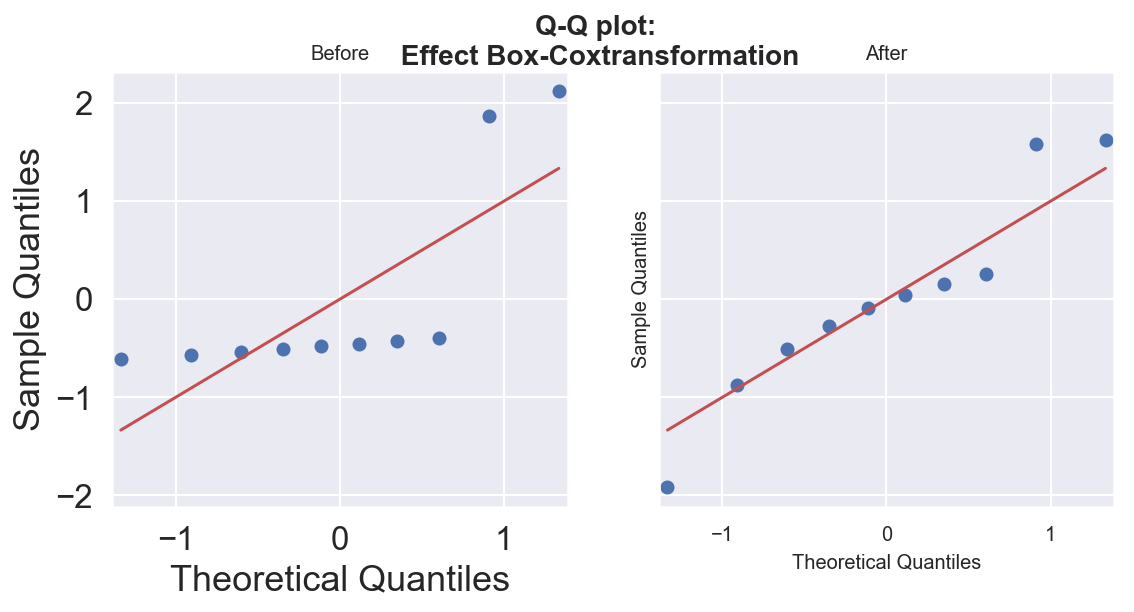

In [179]:
#Q-Q-Plot Check for Normal Distribution, compare befor and after
import statsmodels.api as sm
fig, ax = plt.subplots(ncols=2,figsize=(8,4), sharey=True)
sm.qqplot(df['col2'], line='s', fit=True, ax=ax[0])

ax[0].set_title("Before",fontsize=10)

sm.qqplot(df['col8'], line='s', fit=True, ax=ax[1])
ax[1].set_title("After", fontsize=10)
fig.suptitle('Q-Q plot:\n Effect Box-Coxtransformation', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=10)
plt.ylabel('Sample Quantiles', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



#### Polynomials

In [150]:
df = pd.DataFrame(data_prep)
df = df.dropna()

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
poly_df = pf.fit_transform([df['Col1'], df['col2']][:3])
poly_df = pd.DataFrame(poly_df, columns=pf.get_feature_names())
poly_df

,1,x0,x1,x2,x3,x4,x5,x6,x0^2,x0 x1,...,x3^2,x3 x4,x3 x5,x3 x6,x4^2,x4 x5,x4 x6,x5^2,x5 x6,x6^2
0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,4.0,6.0,...,36.0,42.0,48.0,60.0,49.0,56.0,70.0,64.0,80.0,100.0
1,1.0,2.2,3.3,4.4,6.6,7.7,8.8,100.1,4.8,7.3,...,43.6,50.8,58.1,660.7,59.3,67.8,770.8,77.4,880.9,10020.0


## Define X and y

In [ ]:
# remove categorical features
df.drop(['col1', 'col2', 'col3'], axis=1, inplace=True)
#or dummify
pd.get_dummies(df,columns=['col1'])
#X = pd.get_dummies(X,drop_first=True) #drop_first=True if using in a model, to avoid complete collinearity

# if you do not use patsy:
# define X and y
X = df.drop('yCol', axis=1)
# or
X = [['col1', 'col2', 'col3']] #!!!!!! [[]] 
y = df['ycol'].values
#or
X = df[[c for c in df.columns if not c in ['col1', 'col2']]]
X = df[[c for c in df.columns if c.startswith('XyZ')]]
#or with y in last column
feature_set = X  == data.iloc[:, :-1]
target = y == data.iloc[:, -1]



### Train test split

Create the hold-out set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


### Scaling

Aligning all the features to the same scale is needed for all modelling based on distance. The simple intuition is that when one feature is measured in centimeters and the other one in kilometers the former one will be blown away by the latter. The Standard Scaler standardizes/scales centers of the data around its mean 0 with std 1. (hence can be negative)

Only scale the feature space X, not y. Scaling y would loose its unit of measure .  
** Note ** for decisionstrees : scaling  y is possible(and wise!)

It is a common practise to always scale X, even if it is not necessarily needed. The big advantage of always scaling is that when gridsearching a generic set of hyper parameters can be used.

In case of a train-test split scaling of the test set should happen with the _training set_ mean and std.
Likewise for prediction on new data, the new data needs to be scaled on whatever set the final model was trained on, likely the complete X.


In [36]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


In [37]:
from sklearn.preprocessing import StandardScaler
# initialize the Scaler
ss = StandardScaler()
# Fit the data using the scaler (scale the data)
ss.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train_ = ss.transform(X_train, copy=True)#transform the data sets
X_test= ss.transform(X_test)
print (f'Training set Scaled mean: {round(X_train.mean(),3)}, Scaled Standard deviation: {X_train.std()}')
print (f'Test set Scaled mean: {round(X_test.mean(),3)}, Scaled Standard deviation: {X_test.std()}')

# #In DF format:
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

Training set Scaled mean: 0.0, Scaled Standard deviation: 0.9999999999999999
Test set Scaled mean: -0.093, Scaled Standard deviation: 0.9008188508318591


In [41]:
#method
ss.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [35]:
X_train = ss.inverse_transform(X_train_)

#### Robust scaling
Used when there are outliers which are not or cannot be eliminated 

In [40]:
#get data and inverse the scaling, to go to the unscaled data set
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.inverse_transform(X_train)
X_test = ss.inverse_transform(X_test)
from sklearn.preprocessing import RobustScaler
# initialize the Scaler
rob = RobustScaler()
# Fit the data using the scaler (scale the data)
rob.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = rob.transform(X_train)#transform the data sets
X_test= rob.transform(X_test)
print (f'Training set RobustScaled mean: {round(X_train.mean(),3)}, RobustScaled Standard deviation: {X_train.std()}')
print (f'Test set RobustScaled mean: {round(X_test.mean(),3)}, RobustScaled Standard deviation: {X_test.std()}')



#In DF formate:
# rob = RobustScaler()
# X = pd.DataFrame(rob.fit_transform(df), columns = df.columns)

Training set RobustScaled mean: -0.012, RobustScaled Standard deviation: 0.6489717214430909
Test set RobustScaled mean: -0.057, RobustScaled Standard deviation: 0.594339213153297


#### Min Max scaling

Some algorithms do not like negative values (e.g. BernouilliNB)


In [45]:
# create data set for regression
from sklearn.preprocessing import MinMaxScaler

# initialize the Scaler
mm = MinMaxScaler()
# Fit the data using the scaler (scale the data)
mm.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train_ = mm.fit_transform(X_train)#transform the data sets
X_test = mm.transform(X_test)
print (f'Training set Scaled mean: {round(X_train.mean(),3)}, Scaled Standard deviation: {X_train.std()}')
print (f'Test set Scaled mean: {round(X_test.mean(),3)}, Scaled Standard deviation: {X_test.std()}')

# #In DF format:
# minmax = MinMaxScaler()
# pd.DataFrame(minmax.fit_transform(df), columns = df.columns)



Training set Scaled mean: -0.012, Scaled Standard deviation: 0.6489717214430909
Test set Scaled mean: 0.426, Scaled Standard deviation: 0.24396800909485128


## Processing